Exponential

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor):
    """
    Computes stiffness values based on an exponential growth function.

    Parameters:
    - stiffness_start: Initial stiffness value.
    - stiffness_end: Maximum stiffness value.
    - total_episodes: Number of episodes for training.
    - growth_factor: Controls the growth rate (higher = faster increase).

    Returns:
    - episodes: Array of episode numbers.
    - stiffness_values: Array of stiffness values for each episode.
    """
    episodes = np.arange(total_episodes)
    exponent = growth_factor * episodes
    stiffness_values = stiffness_start + (
        (stiffness_end - stiffness_start) * (np.exp(exponent) - 1) / (np.exp(growth_factor * total_episodes) - 1)
    )
    return episodes, stiffness_values

# Parameters
stiffness_start = 1000
stiffness_end = 10000
total_episodes = 100
growth_factors = [0.005, 0.01, 0.02, 0.05]  # Different growth factors for comparison

# Plot Exponential Growth
plt.figure(figsize=(10, 5))
for growth_factor in growth_factors:
    episodes, stiffness_values = exponential_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor)
    plt.plot(episodes, stiffness_values, label=f'Growth Factor {growth_factor}')

plt.xlabel('Episode')
plt.ylabel('Stiffness Value')
plt.title('Exponential Growth of Stiffness')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logarithmic_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor):
    """
    Computes stiffness values based on a logarithmic growth function.

    Parameters:
    - stiffness_start: Initial stiffness value.
    - stiffness_end: Maximum stiffness value.
    - total_episodes: Number of episodes for training.
    - growth_factor: Controls the growth rate (higher = faster initial increase).

    Returns:
    - episodes: Array of episode numbers.
    - stiffness_values: Array of stiffness values for each episode.
    """
    episodes = np.arange(total_episodes)
    progress = episodes / total_episodes
    adjusted_progress = 1 - np.exp(-growth_factor * progress)
    stiffness_values = stiffness_start + (stiffness_end - stiffness_start) * adjusted_progress
    return episodes, stiffness_values

# Parameters
stiffness_start = 1000
stiffness_end = 10000
total_episodes = 100
growth_factors = [2, 5, 10, 15]  # Different growth factors for comparison

# Plot Logarithmic Growth
plt.figure(figsize=(10, 5))
for growth_factor in growth_factors:
    episodes, stiffness_values = logarithmic_stiffness_growth(stiffness_start, stiffness_end, total_episodes, growth_factor)
    plt.plot(episodes, stiffness_values, label=f'Growth Factor {growth_factor}')

plt.xlabel('Episode')
plt.ylabel('Stiffness Value')
plt.title('Logarithmic Growth of Stiffness')
plt.legend()
plt.grid(True)
plt.show()


(5, 1001)


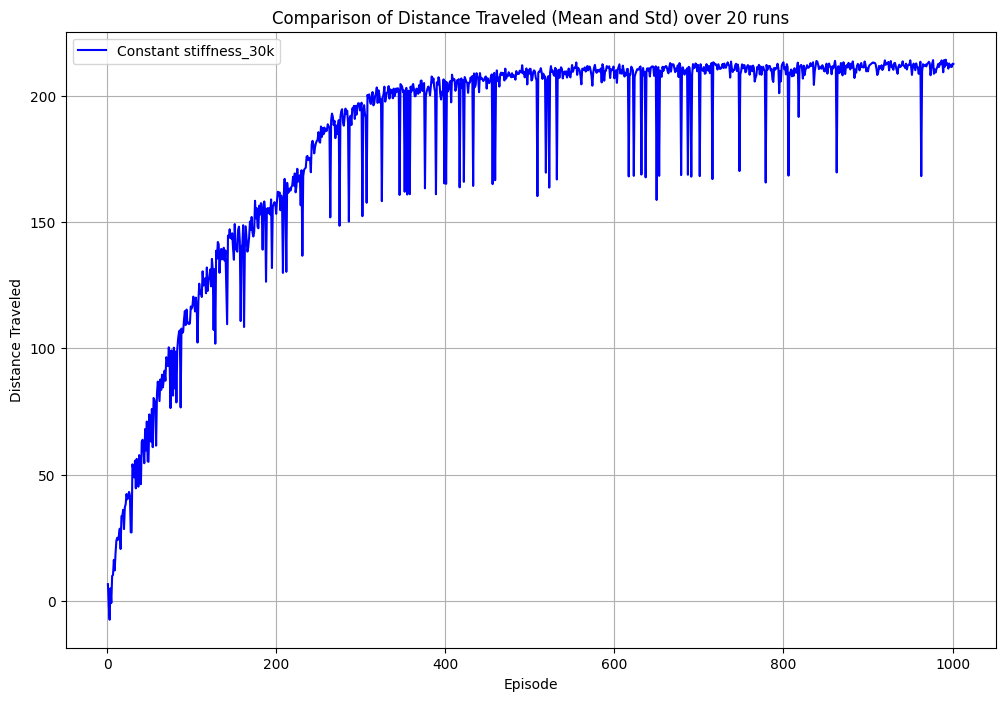

In [28]:
# Load all distance histories for both groups
#C:\Users\User\Desktop\New folder\data\Exponential\distance\distance_history_seed_1.npy
import numpy as np
import matplotlib.pyplot as plt
dist_file = [fr'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun11_constant_30k_constant_5e-04_PPO_seeds_100-100\distance\displacement_history_seed_{seed_value}.npy' for seed_value in range(110, 115)]  # Adjust filenames if necessary
group1_data = [np.load(file) for file in dist_file]

# Convert to arrays for easier computation
group1_data = np.array(group1_data)

# Compute mean and std for each episode
group1_mean = group1_data.mean(axis=0)
group1_std = group1_data.std(axis=0)


# Plotting
plt.figure(figsize=(12, 8))

# Group 1: Constant Tendons _0k

episodes = np.arange(1, group1_mean.shape[0] + 1)
print(group1_data.shape)
plt.plot(episodes, group1_mean, label="Constant stiffness_30k", color="blue", linestyle="-")
#plt.fill_between(episodes, group1_mean - group1_std, group1_mean + group1_std, color="blue", alpha=0.2) # label="Constant Tendons (Std)")

# Formatting the plot
plt.title("Comparison of Distance Traveled (Mean and Std) over 20 runs")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()


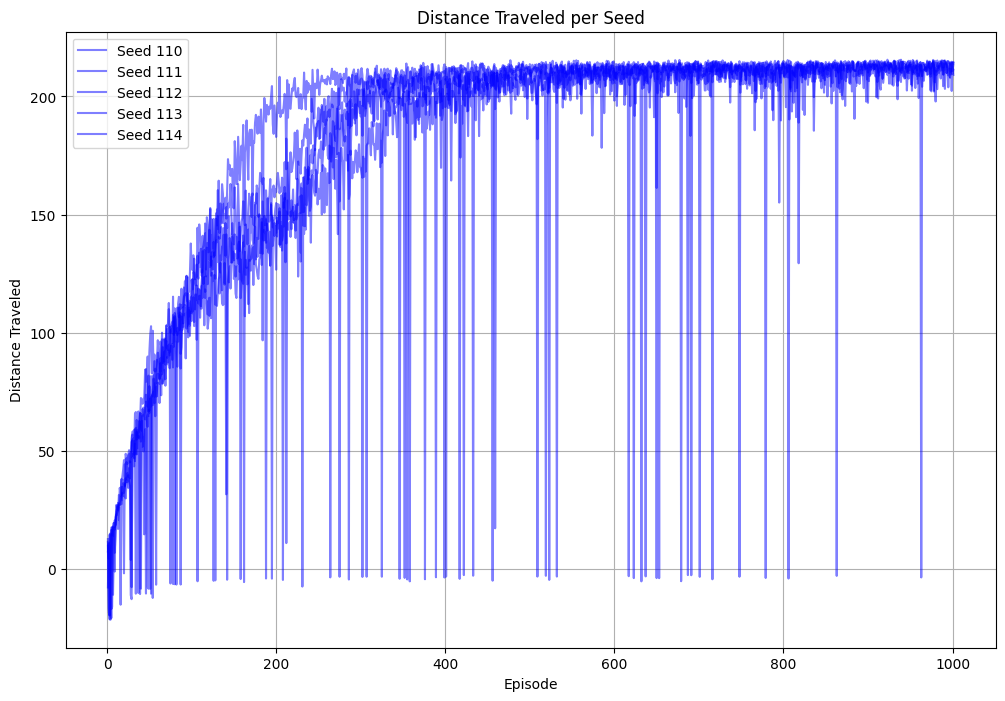

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Load all distance histories for seeds 110 to 114
dist_file = [fr'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun11_constant_30k_constant_5e-04_PPO_seeds_100-100\distance\displacement_history_seed_{seed_value}.npy' for seed_value in range(110, 115)]
group1_data = [np.load(file) for file in dist_file]

# Convert to array
group1_data = np.array(group1_data)

# Plotting individual seeds
plt.figure(figsize=(12, 8))

episodes = np.arange(1, group1_data.shape[1] + 1)

for i, seed_data in enumerate(group1_data):
    plt.plot(episodes, seed_data, label=f"Seed {110 + i}", alpha=0.5, color ='blue')

# Optional: still include mean for reference
group1_mean = group1_data.mean(axis=0)
#plt.plot(episodes, group1_mean, label="Mean", color="black", linewidth=2)

# Formatting the plot
plt.title("Distance Traveled per Seed")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8336\2211652273.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1.03, 0.03, 1, 0.95])


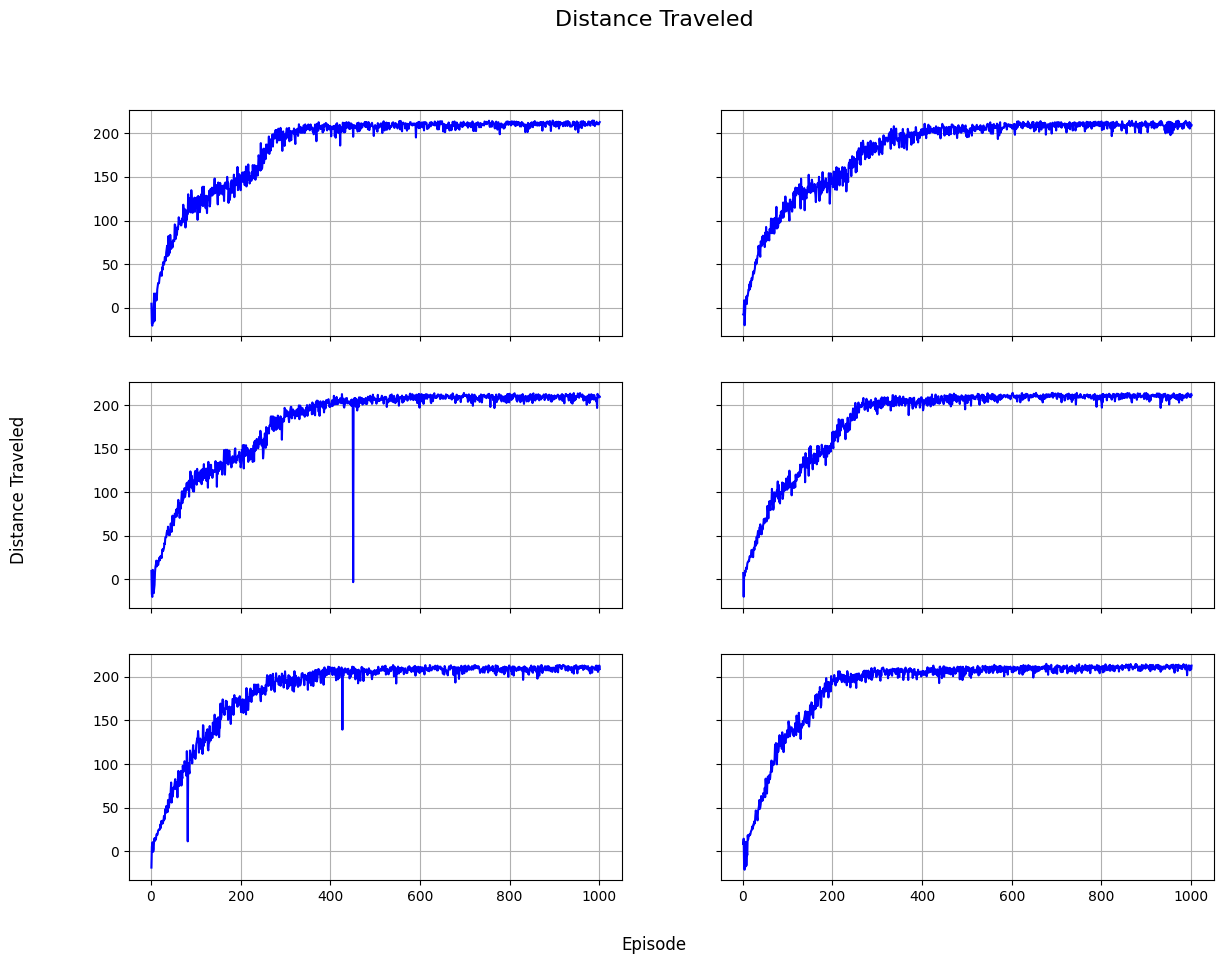

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Use 6 different seeds, adjust range as needed
seed_range = range(110, 116)
dist_file = [fr'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100\distance\displacement_history_seed_{seed_value}.npy' for seed_value in seed_range]
group1_data = [np.load(file) for file in dist_file]

# Convert to array
group1_data = np.array(group1_data)

# Plotting subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

episodes = np.arange(1, group1_data.shape[1] + 1)

for i, seed_data in enumerate(group1_data):
    axs[i].plot(episodes, seed_data, color="blue")
    #axs[i].set_title(f"Seed {seed_range[i]}")
    axs[i].grid(True)

# Global labels
fig.suptitle("Distance Traveled", fontsize=16)
fig.text(0.5, 0.04, 'Episode', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Distance Traveled', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[1.03, 0.03, 1, 0.95])
plt.show()


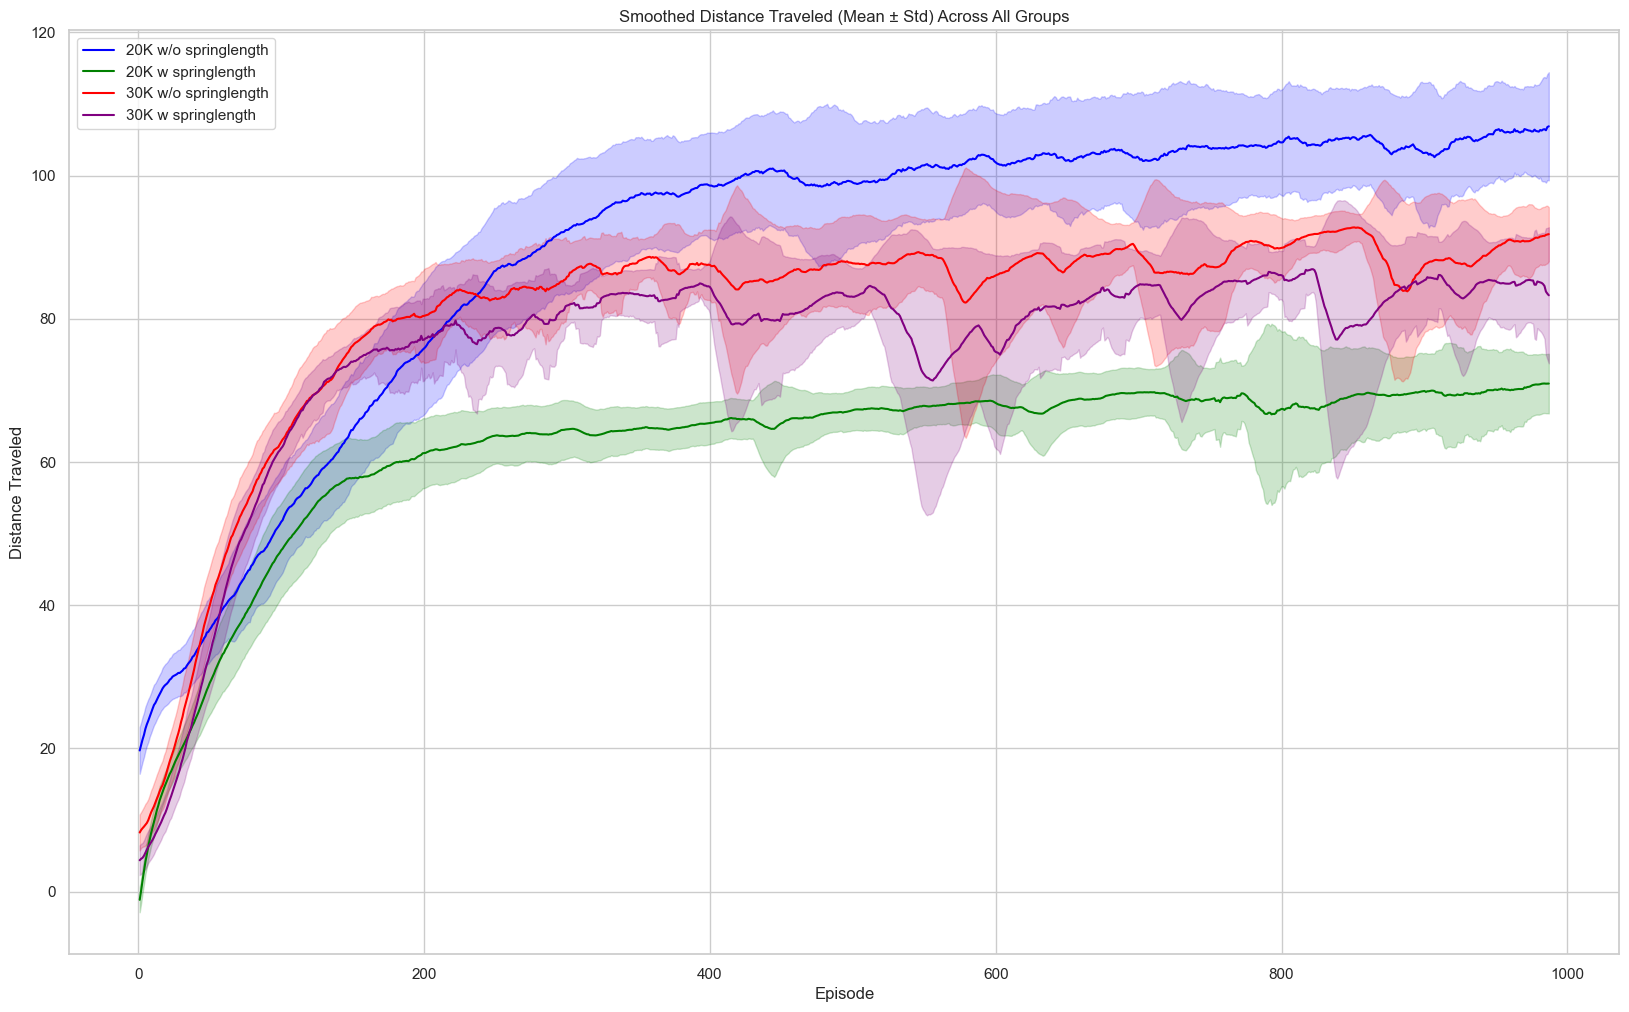

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "20K w/o springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    "20K w springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    "30K w/o springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
    "30K w springlength": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "20K w/o springlength": range(100, 110),
    "20K w springlength":  range(100, 110),# Change these based on your seed filenames
    "30K w/o springlength": range(100, 110),
    "30K w springlength": range(100,110),
}

#
# Colors for plotting
colors = ['blue', 'green', 'red', 'purple']

# Smoothing window size
window_size = 15

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Adjust x-axis to match smoothed data
        episodes = np.arange(1, len(smoothed_mean) + 1)

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)
    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Smoothed Distance Traveled (Mean ± Std) Across All Groups")
plt.xlabel("Episode")
plt.ylabel("Distance Traveled")
plt.legend()
plt.grid(True)
plt.show()

No data loaded for Constant 50K.


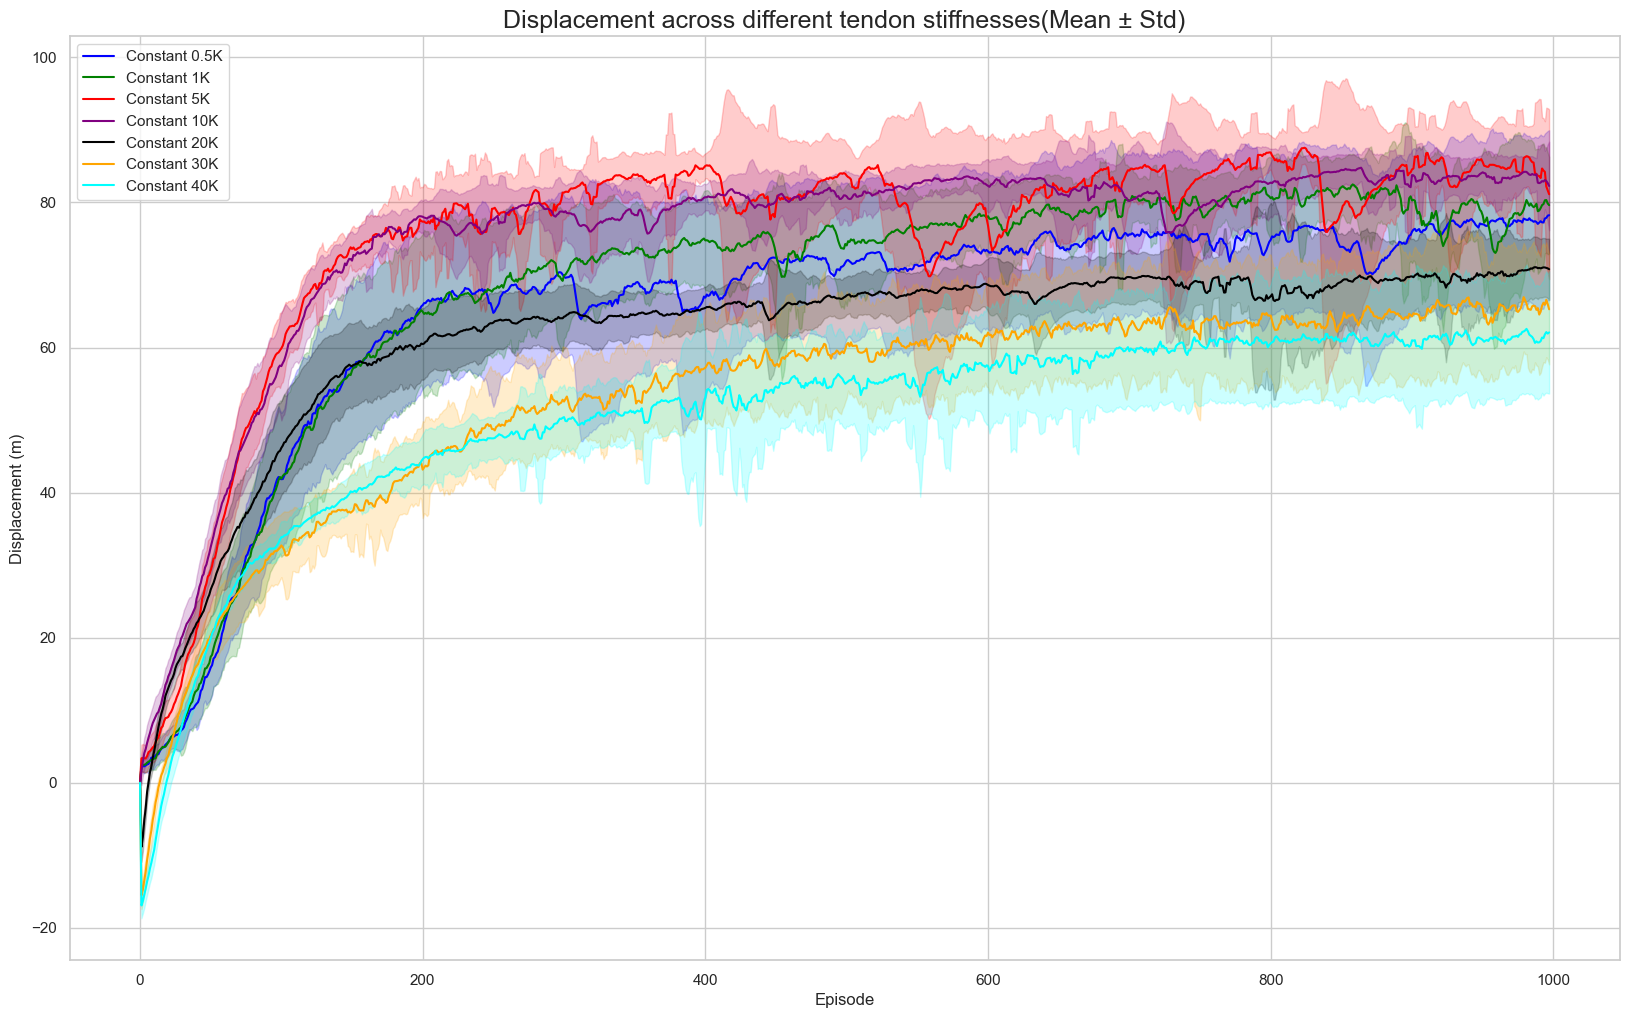

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Define your groups: folder name and seed range
groups = {
    "Constant 0.5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun08_constant_0.5k_constant_5e-04_PPO_seeds_100-100\distance",
     "Constant 1K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun08_constant_1k_constant_5e-04_PPO_seeds_100-100\distance",
     "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_10k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_30k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_40k_constant_5e-04_PPO_seeds_100-100\distance",
    # "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun07_constant_50k_constant_5e-04_PPO_seeds_100-100\distance",
}

# Set corresponding seeds for each group
group_seeds = {
    "Constant 0.5K": range(100, 110),
     "Constant 1K": range(100, 110),
    "Constant 5K": range(100, 110),
    "Constant 10K": range(100, 110),
    # "Constant 15K": range(100, 110),
    "Constant 20K": range(100, 110),
    # "Constant 25K": range(100, 110),
    "Constant 30K": range(100, 110),# Change these based on your seed filenames
    # "Constant 35K": range(100, 110),
    "Constant 40K": range(100, 110),
    # "Constant 45K": range(100, 110),
    "Constant 50K": range(100,110),
}

#
# Colors for plotting
colors = [  'blue', 'green', 'red', 'purple', 'black', 'orange', 'cyan','magenta','brown','darkgrey']


# Smoothing window size
window_size = 5

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []
    for seed in seeds:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            data_list.append(np.load(file_path))
        else:
            print(f"Warning: {file_path} not found.")
    
    if data_list:
        group_data = np.array(data_list)
        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        # Apply smoothing
        smoothed_mean = moving_average(group_mean, window_size)
        smoothed_std = moving_average(group_std, window_size)

        # Add zero at the beginning
        smoothed_mean = np.insert(smoothed_mean, 0, 0)
        smoothed_std = np.insert(smoothed_std, 0, 0)

        # Update episodes to start at 0
        episodes = np.arange(len(smoothed_mean))

        plt.plot(episodes, smoothed_mean, label=label, color=colors[idx], linestyle='-')
        plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color=colors[idx], alpha=0.2)

    else:
        print(f"No data loaded for {label}.")

# Final plot formatting
plt.title("Displacement across different tendon stiffnesses(Mean ± Std)", fontsize = 18)
plt.xlabel("Episode")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

  File not found: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_109.npy


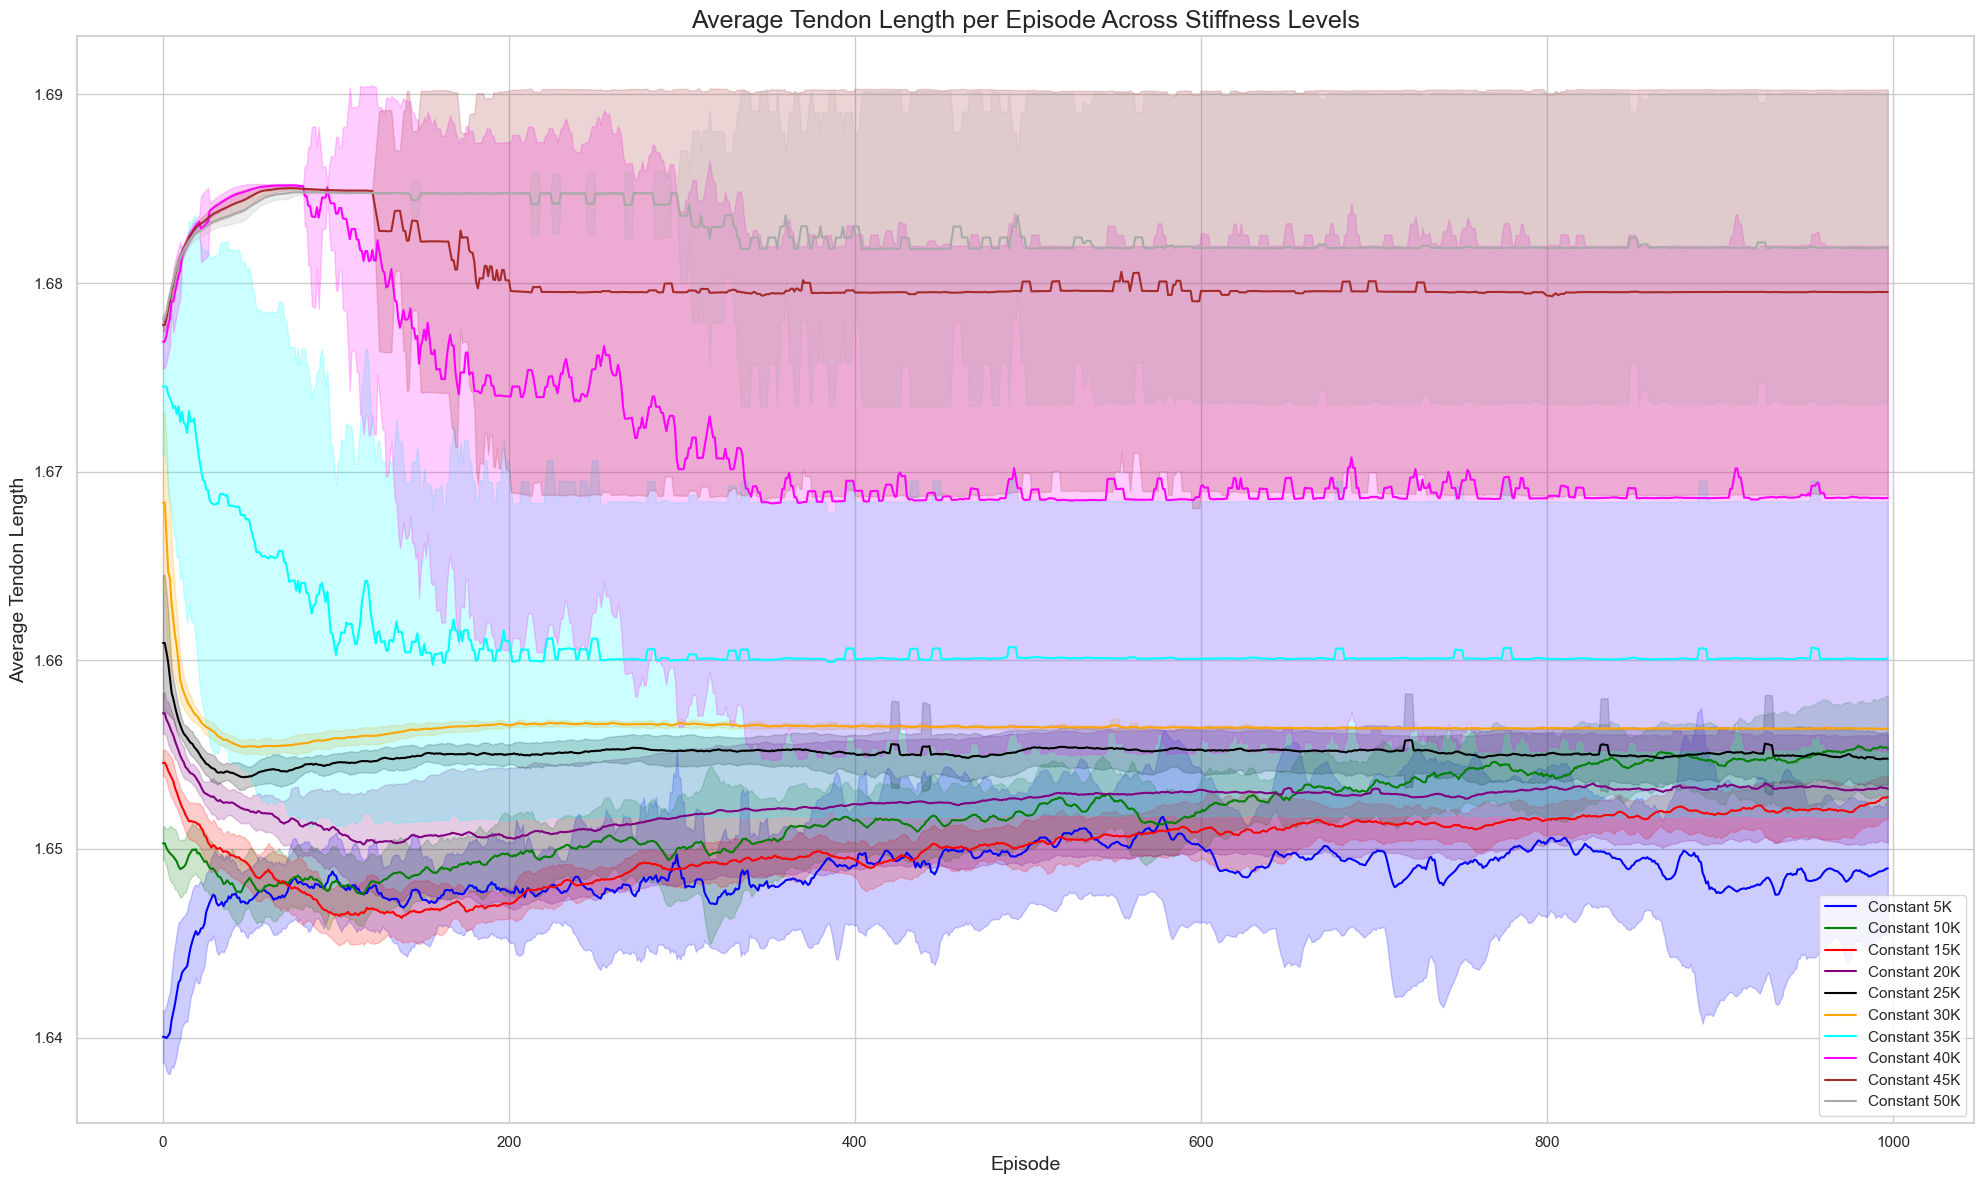

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import os

def moving_average(data, window_size=5):
    """Apply moving average smoothing."""
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Define your groups (tendon_lengths folder)
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_5k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\tendon_lengths",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
}

# Seed range for each group
group_seeds = {k: range(100, 110) for k in groups}

# Plot styling
colors = ['blue', 'green', 'red', 'purple', 'black', 'orange', 'cyan', 'magenta', 'brown', 'darkgrey']
window_size = 5

plt.figure(figsize=(20, 12))

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    data_list = []

    # print(f"\n--- Loading group: {label} ---")

    for seed in seeds:
        tendon_file = os.path.join(folder, f"tendon_lengths_seed_{seed}.npy")
        if os.path.exists(tendon_file):
            try:
                data = np.load(tendon_file, allow_pickle=True)  # shape: (1001, 100, 3)
                data = np.asarray(data, dtype=np.float32)

                # Average over tendons (axis=2), then over timesteps (axis=1)
                episode_means = data.mean(axis=(1, 2))  # shape: (1001,)
                data_list.append(episode_means)
                #print(f"  Loaded seed {seed} with shape {data.shape}")
            except Exception as e:
                print(f"  Error with seed {seed}: {e}")
        else:
            print(f"  File not found: {tendon_file}")

    if data_list:
        # Truncate to shortest length
        min_len = min(len(arr) for arr in data_list)
        data_list = [arr[:min_len] for arr in data_list]
        group_data = np.stack(data_list, axis=0)  # shape: (num_seeds, episodes)

        group_mean = group_data.mean(axis=0)
        group_std = group_data.std(axis=0)

        if len(group_mean) >= window_size:
            smoothed_mean = moving_average(group_mean, window_size)
            smoothed_std = moving_average(group_std, window_size)

            # Optional: repeat first value for nicer starting point
            smoothed_mean = np.insert(smoothed_mean, 0, smoothed_mean[0])
            smoothed_std = np.insert(smoothed_std, 0, smoothed_std[0])
            episodes = np.arange(len(smoothed_mean))

            plt.plot(episodes, smoothed_mean, label=label, color=colors[idx])
            plt.fill_between(episodes, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std,
                             color=colors[idx], alpha=0.2)
        else:
            print(f"  Not enough data for smoothing in group {label}.")
    else:
        print(f"  No valid data loaded for group {label}.")

# Final plot formatting
plt.title("Average Tendon Length per Episode Across Stiffness Levels", fontsize=18)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Average Tendon Length", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Missing: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_109.npy


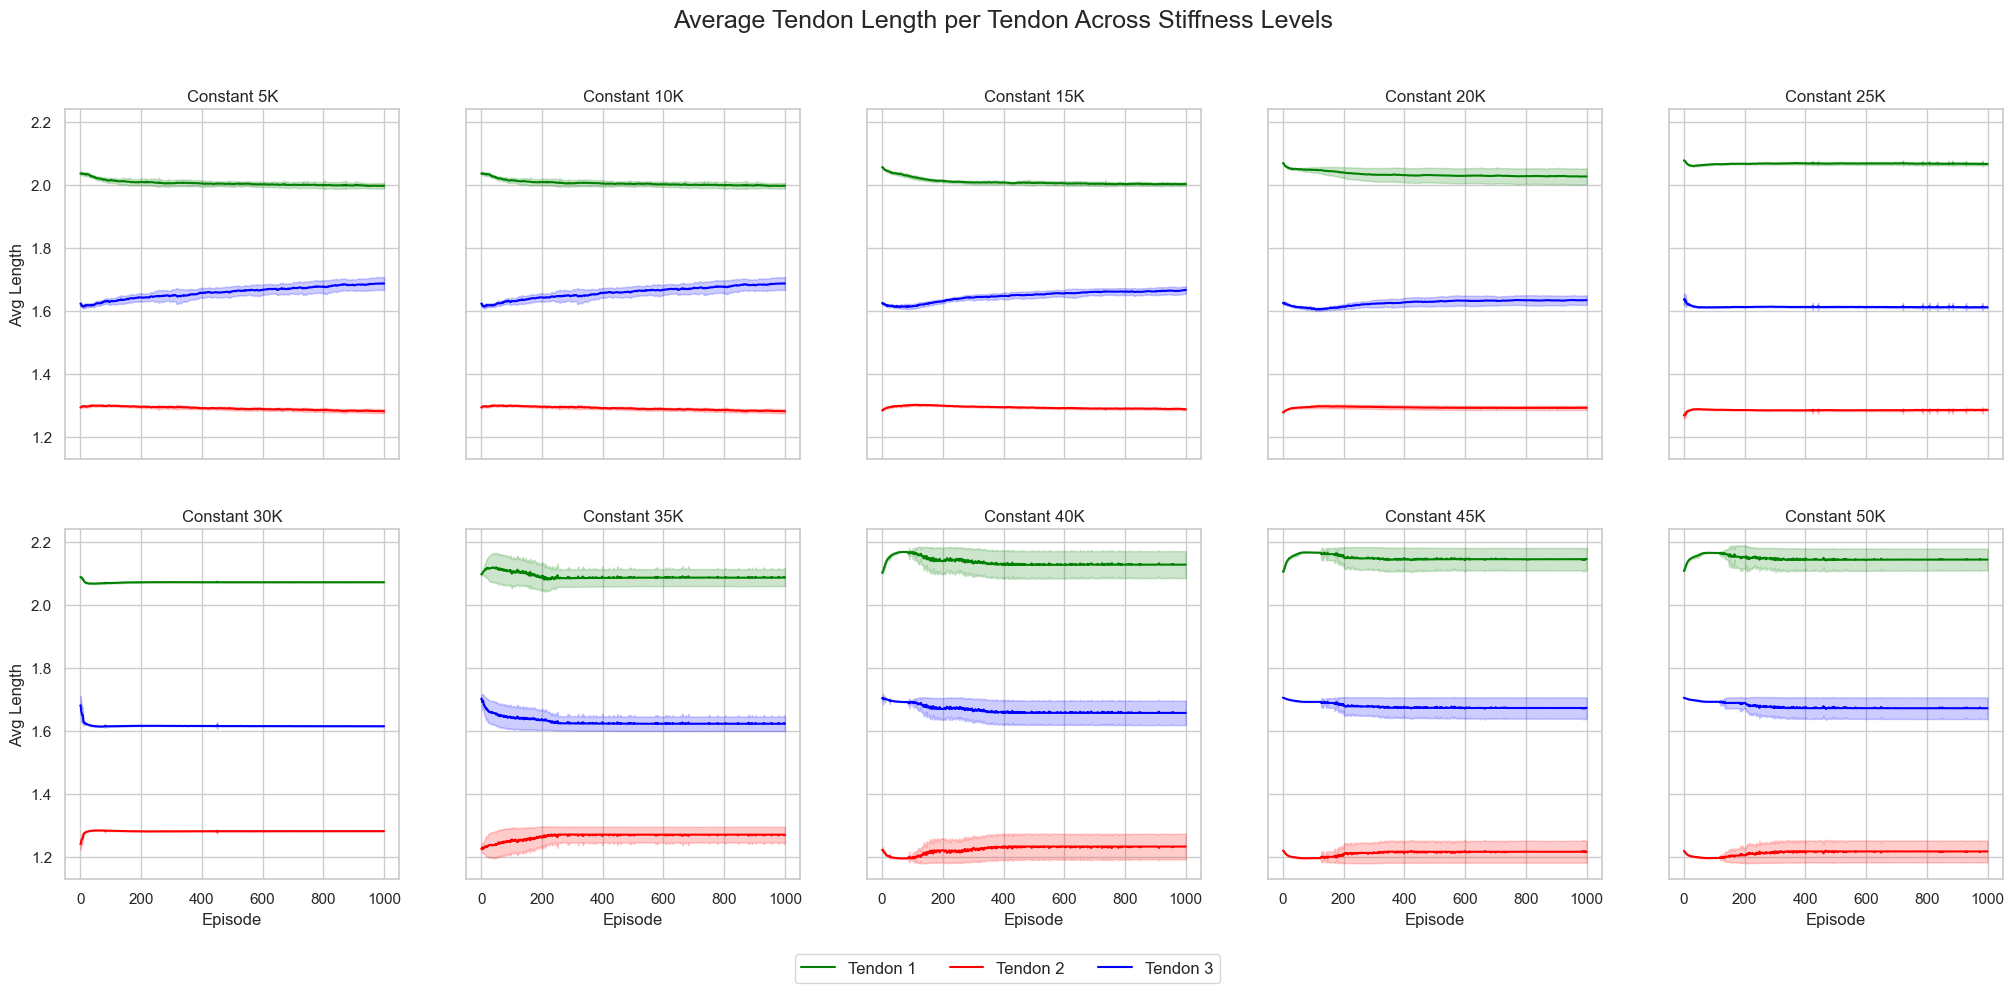

In [175]:
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\tendon_lengths",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\tendon_lengths",
}
group_seeds = {k: range(100, 120) for k in groups}
window_size = 2

# Set up 2x5 subplots
fig, axes = plt.subplots(2, 5, figsize=(25, 10), sharex=True, sharey=True)
axes = axes.flatten()
tendon_colors = [ 'green', 'red', 'blue']

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    all_seeds_data = []

    for seed in seeds:
        path = os.path.join(folder, f"tendon_lengths_seed_{seed}.npy")
        if os.path.exists(path):
            try:
                data = np.load(path, allow_pickle=True)  # shape: (episodes, timesteps, 3)
                data = np.asarray(data, dtype=np.float32)

                # Avg over time (axis=1), keep 3 tendons → shape: (episodes, 3)
                episode_means = data.mean(axis=1)
                all_seeds_data.append(episode_means)
            except Exception as e:
                print(f"Error loading seed {seed} from {label}: {e}")
        else:
            print(f"Missing: {path}")

    ax = axes[idx]
    ax.set_title(label)

    if all_seeds_data:
        min_len = min([d.shape[0] for d in all_seeds_data])
        all_seeds_data = [d[:min_len] for d in all_seeds_data]
        group_array = np.stack(all_seeds_data, axis=0)  # shape: (seeds, episodes, 3)

        mean = group_array.mean(axis=0)  # shape: (episodes, 3)
        std = group_array.std(axis=0)

        # Apply smoothing to each tendon
        for tendon_idx in range(3):
            tendon_mean = moving_average(mean[:, tendon_idx], window_size)
            tendon_std = moving_average(std[:, tendon_idx], window_size)

            tendon_mean = np.insert(tendon_mean, 0, tendon_mean[0])
            tendon_std = np.insert(tendon_std, 0, tendon_std[0])
            episodes = np.arange(len(tendon_mean))

            ax.plot(episodes, tendon_mean, label=f"Tendon {tendon_idx+1}", color=tendon_colors[tendon_idx])
            ax.fill_between(episodes, tendon_mean - tendon_std, tendon_mean + tendon_std,
                            color=tendon_colors[tendon_idx], alpha=0.2)

    ax.grid(True)
    if idx % 5 == 0:
        ax.set_ylabel("Avg Length")
    if idx >= 5:
        ax.set_xlabel("Episode")

# Final formatting
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=12)
fig.suptitle("Average Tendon Length per Tendon Across Stiffness Levels", fontsize=18)
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12012\1796297185.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


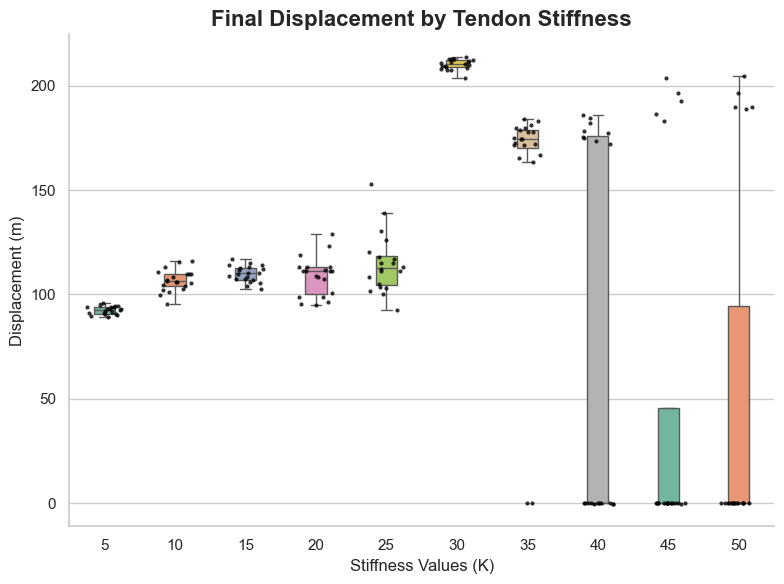

In [174]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Collect data
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_5k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\distance",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\distance",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\distance",
}
group_seeds = {k: range(100, 120) for k in groups}

# Flatten data into a DataFrame
data = []
for label, folder in groups.items():
    for seed in group_seeds[label]:
        file_path = os.path.join(folder, f"displacement_history_seed_{seed}.npy")
        if os.path.exists(file_path):
            displacement = np.load(file_path)[-1]  # last value
            data.append({"Stiffness": label, "Displacement": displacement})
        else:
            print(f"Warning: {file_path} not found.")

df = pd.DataFrame(data)

# Plot with seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")



# Extract numeric stiffness for cleaner x-axis labels
df["Stiffness"] = df["Stiffness"].str.extract(r'(\d+)').astype(int)
df = df.sort_values("Stiffness") 


# Boxplot
sns.boxplot(
    x="Stiffness",
    y="Displacement",
    data=df,
    palette="Set2",
    width=0.3,
    fliersize=0  # hide seaborn's default outliers
)

# Overlay data points
sns.stripplot(
    x="Stiffness",
    y="Displacement",
    data=df,
    color="black",
    size=3,
    jitter=0.25,
    alpha=0.8
)

# Clean formatting
plt.title("Final Displacement by Tendon Stiffness", fontsize=16, weight='bold')
plt.xlabel("Stiffness Values (K)", fontsize=12)
plt.ylabel("Displacement (m)", fontsize=12)
#plt.xticks(rotation=30)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


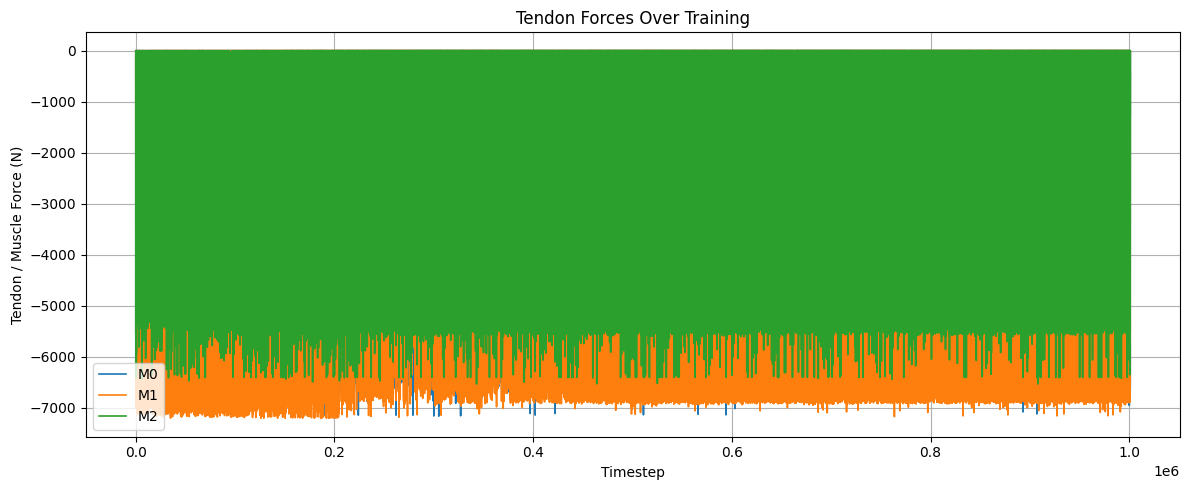

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Update paths based on your folder/seed
folder = r"LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\tendon_forces"
seed = 100
file_path = rf'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\{folder}\tendon_forces_seed_100.npy'

# Load
all_episodes = np.load(file_path, allow_pickle=True)

# Concatenate all timesteps across episodes
forces_over_time = np.concatenate(all_episodes, axis=0)  # shape: (T, 3)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(forces_over_time[:, 0], label="M0", linewidth=1.2)
plt.plot(forces_over_time[:, 1], label="M1", linewidth=1.2)
plt.plot(forces_over_time[:, 2], label="M2", linewidth=1.2)
plt.xlabel("Timestep")
plt.ylabel("Tendon / Muscle Force (N)")
plt.title("Tendon Forces Over Training")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


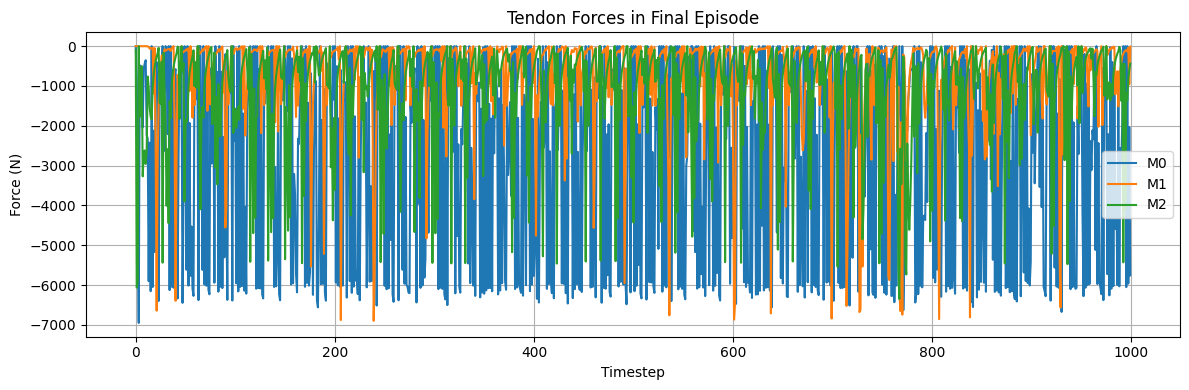

In [14]:
last_ep = np.array(all_episodes[-1])  # shape: (T, 3)

plt.figure(figsize=(12, 4))
plt.plot(last_ep[:, 0], label='M0')
plt.plot(last_ep[:, 1], label='M1')
plt.plot(last_ep[:, 2], label='M2')
plt.title("Tendon Forces in Final Episode")
plt.xlabel("Timestep")
plt.ylabel("Force (N)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


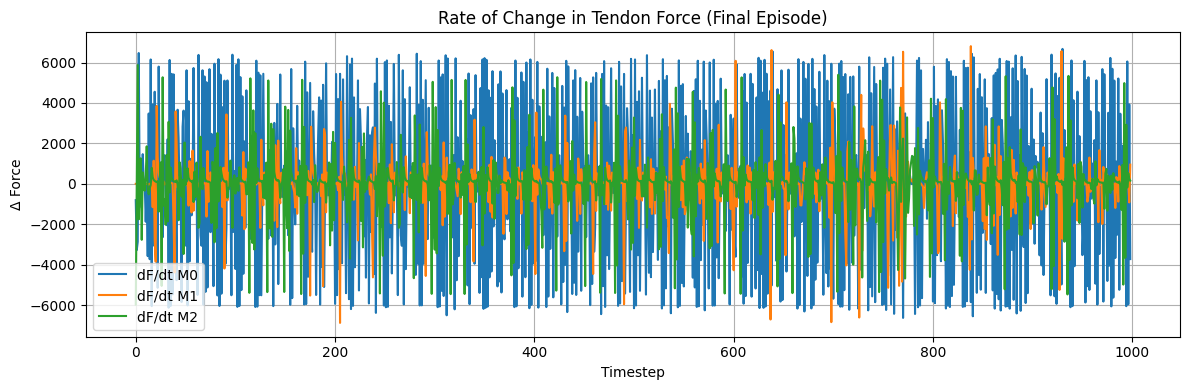

In [15]:
force_rate = np.diff(last_ep, axis=0)  # shape: (T-1, 3)

plt.figure(figsize=(12, 4))
plt.plot(force_rate[:, 0], label='dF/dt M0')
plt.plot(force_rate[:, 1], label='dF/dt M1')
plt.plot(force_rate[:, 2], label='dF/dt M2')
plt.title("Rate of Change in Tendon Force (Final Episode)")
plt.xlabel("Timestep")
plt.ylabel("Δ Force")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


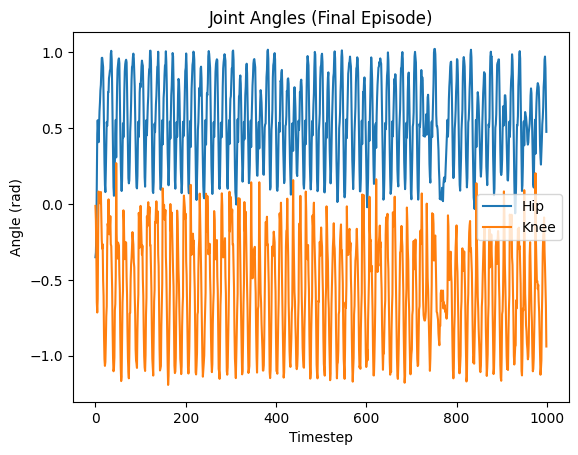

In [26]:
# Load
folder = r"LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics"
qpos = np.load(fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics\qpos_seed_100.npy', allow_pickle=True)
qvel = np.load(fr'C:\Users\User\Desktop\New folder\AimIV\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_May28_constant20k_constant20kOnly_constant_5e-04_PPO\kinematics\qvel_seed_100.npy', allow_pickle=True)

# Example: Final episode, hip and knee angles
last_qpos = np.array(qpos[-1])  # shape (T, dof)
last_qvel = np.array(qvel[-1])

plt.plot(last_qpos[:, 1], label="Hip")
plt.plot(last_qpos[:, 2], label="Knee")
plt.title("Joint Angles (Final Episode)")
plt.xlabel("Timestep")
plt.ylabel("Angle (rad)")
plt.legend()
plt.show()


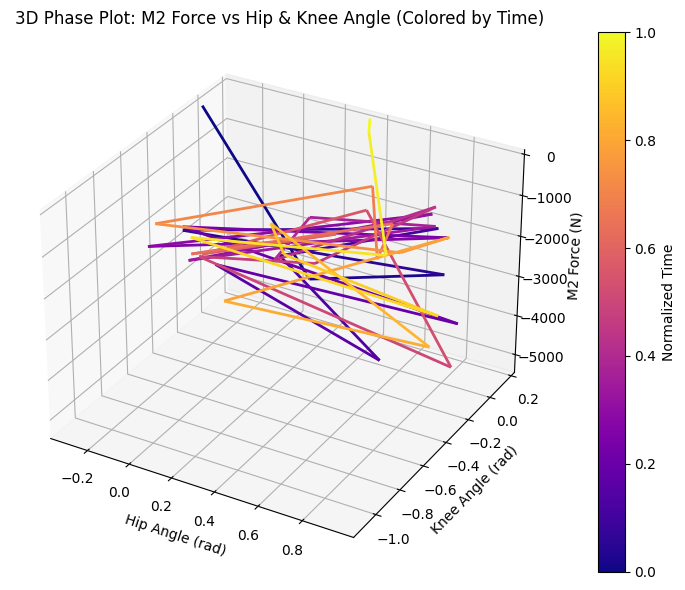

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

# Downsample
step = 25
hip_angle = last_qpos[::step, 1]
knee_angle = last_qpos[::step, 2]
m2_force = last_forces[::step, 2]

# Prepare segments for line collection
points = np.array([hip_angle, knee_angle, m2_force]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create color map based on time
time_steps = np.linspace(0, 1, len(segments))  # normalized time
colors = cm.plasma(time_steps)  # or use 'viridis', 'inferno', etc.

# Create 3D line collection
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

line_collection = Line3DCollection(segments, colors=colors, linewidth=2)
ax.add_collection3d(line_collection)

# Set axis limits
ax.set_xlim(hip_angle.min(), hip_angle.max())
ax.set_ylim(knee_angle.min(), knee_angle.max())
ax.set_zlim(m2_force.min(), m2_force.max())

ax.set_xlabel("Hip Angle (rad)")
ax.set_ylabel("Knee Angle (rad)")
ax.set_zlabel("M2 Force (N)")
ax.set_title("3D Phase Plot: M2 Force vs Hip & Knee Angle (Colored by Time)")

# Add colorbar
mappable = cm.ScalarMappable(cmap='plasma')
mappable.set_array(time_steps)
fig.colorbar(mappable, ax=ax, label="Normalized Time")

plt.tight_layout()
plt.show()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0.05174212  0.08681977 -0.63162494]


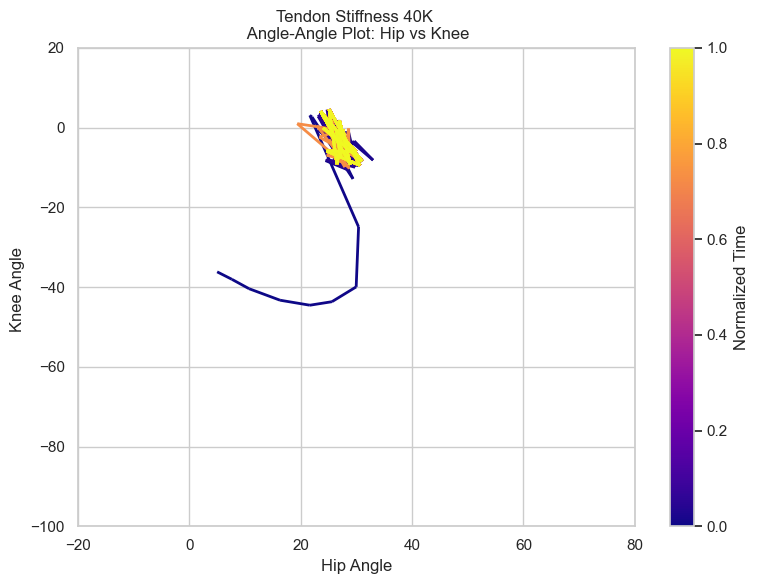

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

# Load data (adjust paths if needed)
folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\Dynamic-tendon-Leg\data\LegEnv_Jun10_constant_30k_constant_5e-04_PPO_seeds_100-100"
seed = 100
force_path = fr'{folder}/tendon_forces/tendon_forces_seed_{seed}.npy'
qpos_path = fr'{folder}/kinematics/qpos_seed_{seed}.npy'


qpos_data = np.load(qpos_path, allow_pickle=True)
#last_qpos = np.array(qpos_data[-1])     # shape (T, dof)
# Convert object array of arrays to real 2D float array
last_qpos = np.array([np.array(x, dtype=np.float32) for x in qpos_data[-1]])

print(type(last_qpos))
print(type(last_qpos[0]))
print(last_qpos[0])


# Turn 1D array of arrays into 2D array
last_qpos = np.stack(last_qpos)

# Downsample data
step = 1
hip_angles =np.degrees(last_qpos[::step, 1])
knee_angles = np.degrees(last_qpos[::step, 2])




# Create line segments from (hip, knee) points
points = np.array([hip_angles, knee_angles]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize time for color mapping
time_steps = np.linspace(0, 1, len(segments))
colors = cm.plasma(time_steps)

# Create line collection for colored path
lc = LineCollection(segments, colors=colors, linewidth=2)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc)
ax.set_xlim(-20, 80)
ax.set_ylim(-100, 20)
ax.set_xlabel("Hip Angle")
ax.set_ylabel("Knee Angle ")
ax.set_title("Tendon Stiffness 40K \n Angle-Angle Plot: Hip vs Knee")

# Colorbar
mappable = cm.ScalarMappable(cmap='plasma')
mappable.set_array(time_steps)
fig.colorbar(mappable, ax=ax, label="Normalized Time")

plt.tight_layout()
plt.show()


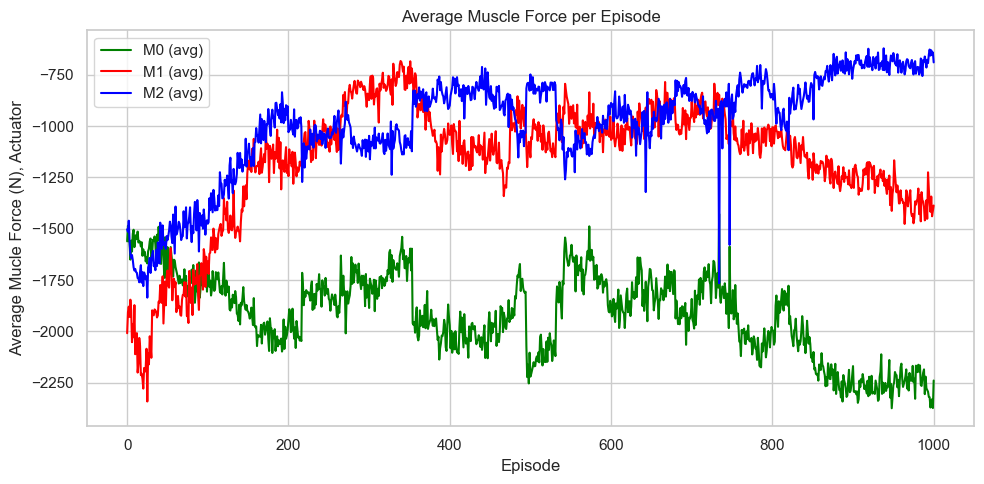

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Load previously saved tendon forces
folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100"
seed = 102
force_path = fr'{folder}/actuator_forces/actuator_forces_seed_{seed}.npy'
episodes = np.load(force_path, allow_pickle=True)

# Compute average force per episode
episode_means = np.array([
    np.mean(np.array(ep), axis=0) for ep in episodes  # shape: (num_episodes, 3)
])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(episode_means[:, 0], label='M0 (avg)', color ="green")
plt.plot(episode_means[:, 1], label='M1 (avg)', color= "red")
plt.plot(episode_means[:, 2], label='M2 (avg)', color= "blue")

plt.xlabel("Episode")
plt.ylabel("Average Mucle Force (N)")
plt.title("Average Muscle Force per Episode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


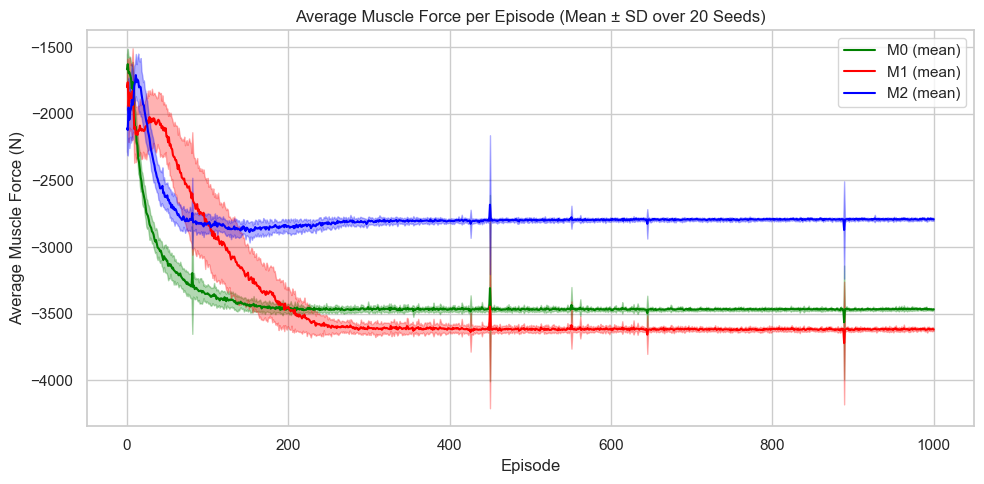

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Configuration
folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100"
seed_range = range(100, 120)  # 20 seeds: 100 to 119

all_episode_means = []

for seed in seed_range:
    force_path = os.path.join(folder, f'actuator_forces/actuator_forces_seed_{seed}.npy')
    if not os.path.exists(force_path):
        print(f"Missing file for seed {seed}: {force_path}")
        continue

    episodes = np.load(force_path, allow_pickle=True)
    
    # Ensure each episode is converted to proper float arrays
    try:
        episode_means = np.array([
            np.mean(np.array(ep, dtype=np.float32), axis=0) for ep in episodes
        ])
        all_episode_means.append(episode_means)
    except Exception as e:
        print(f"Error processing seed {seed}: {e}")

# Make sure we have valid seeds
if not all_episode_means:
    raise RuntimeError("No valid episode data loaded.")

# Align episode lengths
min_episodes = min([ep.shape[0] for ep in all_episode_means])
all_episode_means = np.array([ep[:min_episodes] for ep in all_episode_means], dtype=np.float32)

# Compute mean and std
mean_across_seeds = np.mean(all_episode_means, axis=0)
std_across_seeds = np.std(all_episode_means, axis=0)

# Plot
episodes = np.arange(min_episodes)
plt.figure(figsize=(10, 5))

muscle_labels = ['M0', 'M1', 'M2']
colors = ['green', 'red', 'blue']

for i in range(3):
    plt.plot(episodes, mean_across_seeds[:, i], label=f'{muscle_labels[i]} (mean)', color=colors[i])
    plt.fill_between(
        episodes,
        mean_across_seeds[:, i] - std_across_seeds[:, i],
        mean_across_seeds[:, i] + std_across_seeds[:, i],
        color=colors[i],
        alpha=0.3,
        #label=f'{muscle_labels[i]} ±1 SD'
    )

plt.xlabel("Episode")
plt.ylabel("Average Muscle Force (N)")
plt.title("Average Muscle Force per Episode (Mean ± SD over 20 Seeds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Missing: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\actuator_forces\actuator_forces_seed_109.npy


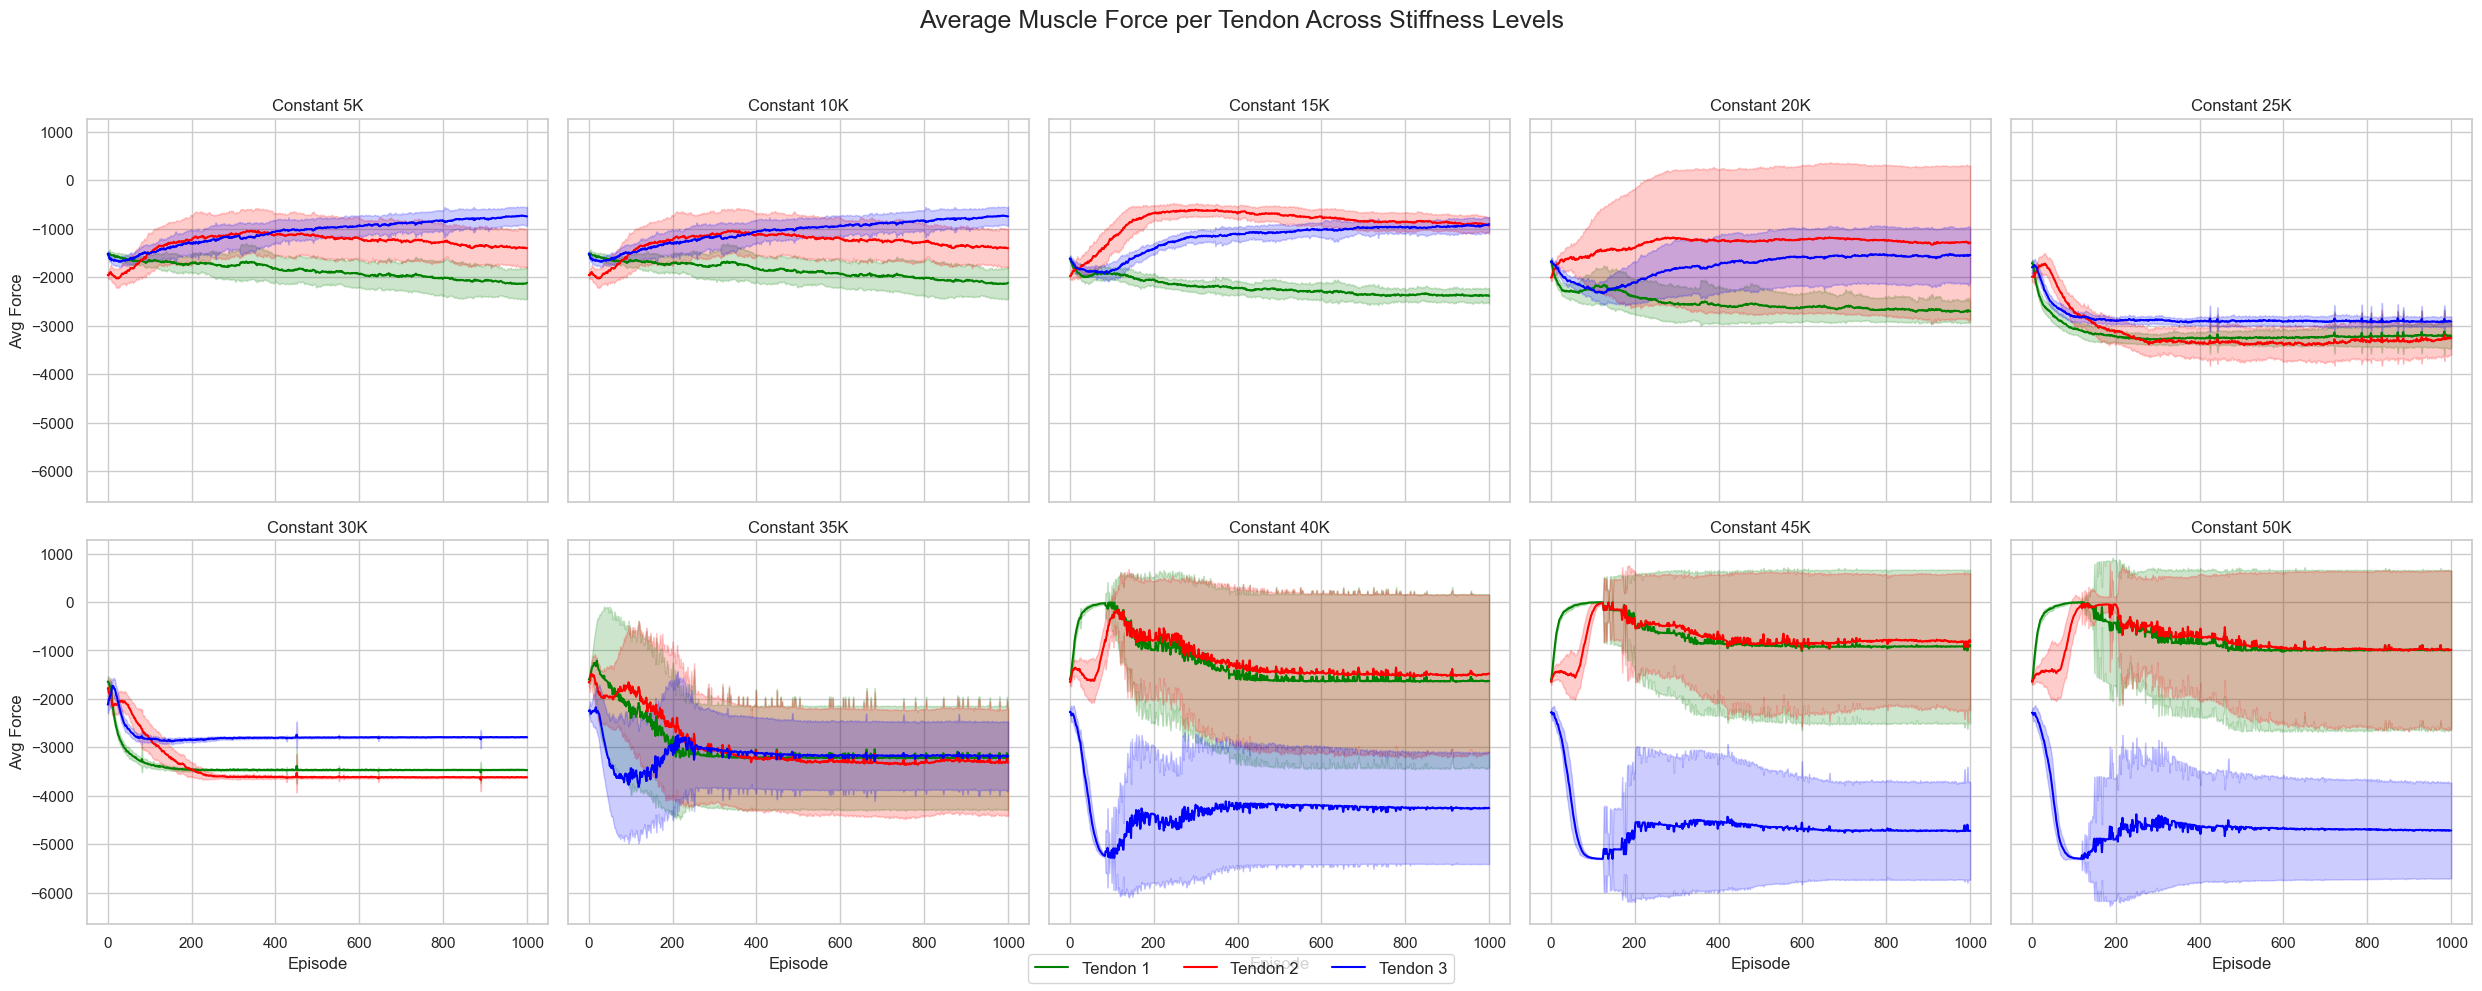

In [224]:
groups = {
    "Constant 5K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 10K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 15K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_15k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 20K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 25K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_25k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 30K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 35K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_35k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 40K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_40k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 45K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_45k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
    "Constant 50K": r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\actuator_forces",
}
group_seeds = {k: range(100, 120) for k in groups}
window_size = 2

# Set up 2x5 subplots
fig, axes = plt.subplots(2, 5, figsize=(25, 10), sharex=True, sharey=True)
axes = axes.flatten()
tendon_colors = [ 'green', 'red', 'blue']

for idx, (label, folder) in enumerate(groups.items()):
    seeds = group_seeds[label]
    all_seeds_data = []

    for seed in seeds:
        path = os.path.join(folder, f"actuator_forces_seed_{seed}.npy")
        if os.path.exists(path):
            try:
                data = np.load(path, allow_pickle=True)  # shape: (episodes, timesteps, 3)
                data = np.asarray(data, dtype=np.float32)

                # Avg over time (axis=1), keep 3 tendons → shape: (episodes, 3)
                episode_means = data.mean(axis=1)
                all_seeds_data.append(episode_means)
            except Exception as e:
                print(f"Error loading seed {seed} from {label}: {e}")
        else:
            print(f"Missing: {path}")

    ax = axes[idx]
    ax.set_title(label)

    if all_seeds_data:
        min_len = min([d.shape[0] for d in all_seeds_data])
        all_seeds_data = [d[:min_len] for d in all_seeds_data]
        group_array = np.stack(all_seeds_data, axis=0)  # shape: (seeds, episodes, 3)

        mean = group_array.mean(axis=0)  # shape: (episodes, 3)
        std = group_array.std(axis=0)

        # Apply smoothing to each tendon
        for tendon_idx in range(3):
            tendon_mean = moving_average(mean[:, tendon_idx], window_size)
            tendon_std = moving_average(std[:, tendon_idx], window_size)

            tendon_mean = np.insert(tendon_mean, 0, tendon_mean[0])
            tendon_std = np.insert(tendon_std, 0, tendon_std[0])
            episodes = np.arange(len(tendon_mean))

            ax.plot(episodes, tendon_mean, label=f"Tendon {tendon_idx+1}", color=tendon_colors[tendon_idx])
            ax.fill_between(episodes, tendon_mean - tendon_std, tendon_mean + tendon_std,
                            color=tendon_colors[tendon_idx], alpha=0.2)

    ax.grid(True)
    if idx % 5 == 0:
        ax.set_ylabel("Avg Force")
    if idx >= 5:
        ax.set_xlabel("Episode")

# Final formatting
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=12)
fig.suptitle("Average Muscle Force per Tendon Across Stiffness Levels", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

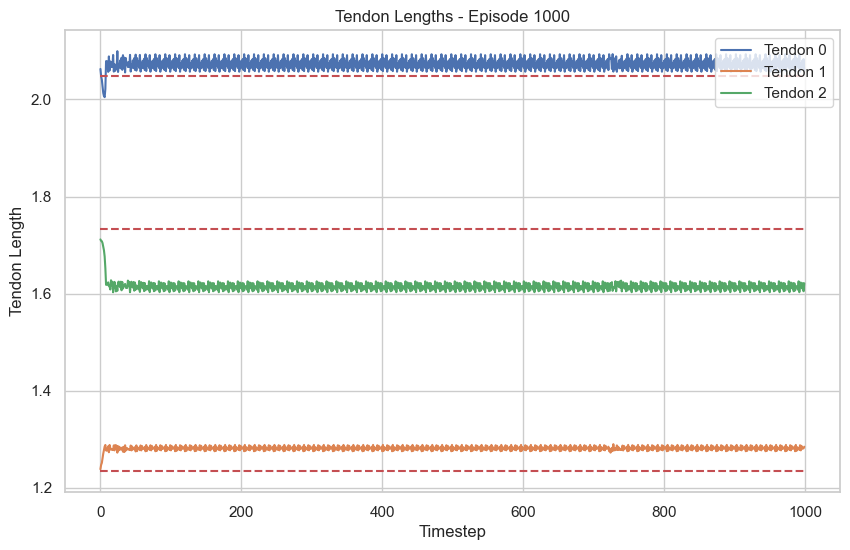

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Load tendon lengths (adjust path & seed)
data = np.load(r'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_30k_constant_5e-04_PPO_seeds_100-100_default\tendon_lengths\tendon_lengths_seed_100.npy', allow_pickle=True)

# Each element in `data` is one episode
episode_index = 1000  # change this to select episode
episode_data = data[episode_index]  # shape: (timesteps, tendons)

plt.figure(figsize=(10, 6))
for tendon_idx in range(episode_data.shape[1]):
    plt.plot([step[tendon_idx] for step in episode_data], label=f'Tendon {tendon_idx}')


# T_M0: 2.0486 m
# T_M1: 1.2341 m
# T_M2: 1.7341 m

# Draw horizontal lines at y=1, y=2 and y=3
plt.hlines(y=[2.0486, 1.2341, 1.7341], xmin=0, xmax=1000, colors='r', linestyles='--')

plt.title(f'Tendon Lengths - Episode {episode_index}')
plt.xlabel('Timestep')
plt.ylabel('Tendon Length')
plt.legend()
plt.grid(True)
plt.show()


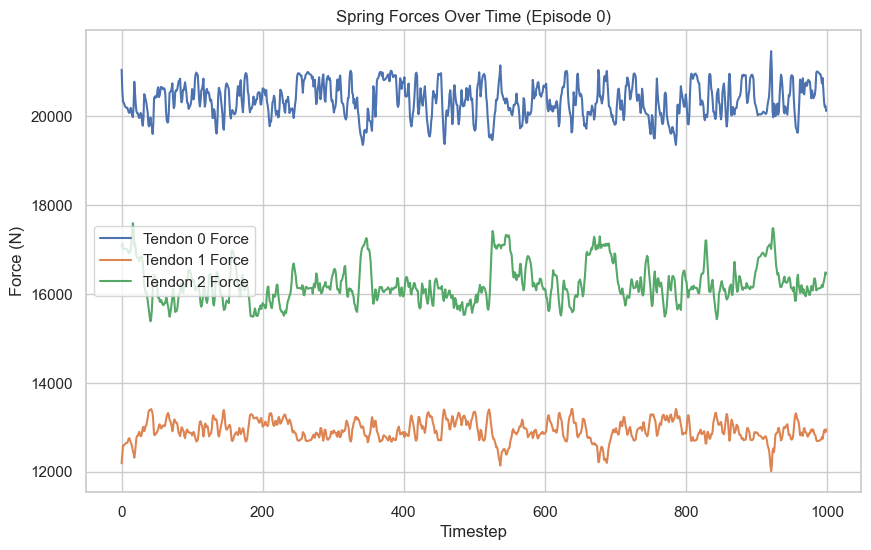

In [61]:
# Constants from your XML
rest_length = 0.0  # meters
stiffness = 10000  # N/m

# Choose an episode to analyze
episode_index = 0
episode_data = np.array(data[episode_index])  # shape: (timesteps, 3)

# Compute spring forces for each tendon over time
forces = stiffness * np.maximum(0, episode_data - rest_length)  # shape: (timesteps, 3)

# Plot forces over time for each tendon
plt.figure(figsize=(10, 6))
for tendon_idx in range(forces.shape[1]):
    plt.plot(forces[:, tendon_idx], label=f'Tendon {tendon_idx} Force')

plt.title(f'Spring Forces Over Time (Episode {episode_index})')
plt.xlabel('Timestep')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)
plt.show()

(1001, 1000, 3)


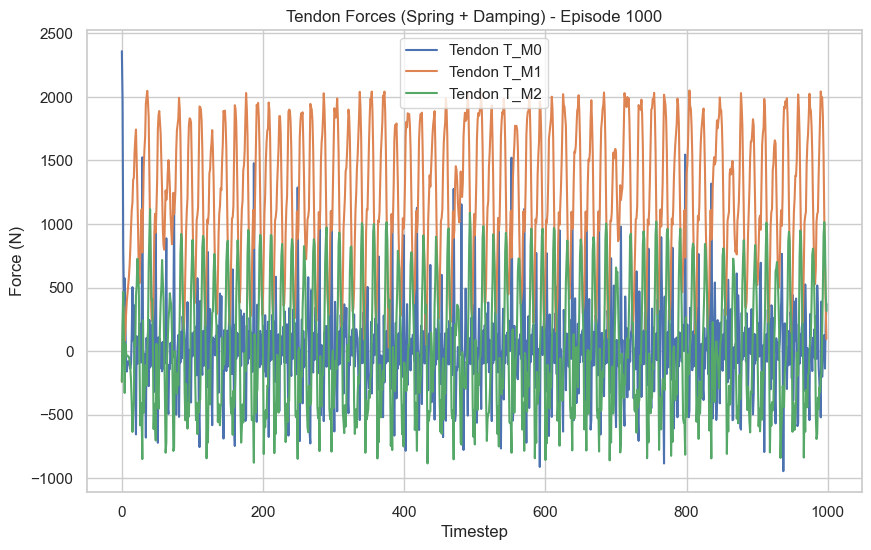

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Load tendon lengths (each episode is (timesteps, 3))
data = np.load(r'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_100.npy', allow_pickle=True)
print(np.shape(data))
# Constants
rest_lengths = np.array([2.0486, 1.2341, 1.7341])  # m
stiffness = 20000  # N/m
damping = 100     # Ns/m
dt = 0.005        # simulation timestep (from your XML <option timestep="0.005" />)

# Select episode
episode_index = 1000
episode_data = np.array(data[episode_index])  # shape: (timesteps, 3)

# Compute tendon velocities (finite difference)
velocities = np.diff(episode_data, axis=0) / dt  # shape: (timesteps-1, 3)
# To align dimensions, chop last timestep from episode_data
lengths = episode_data[:-1]

# Compute spring force
spring_force = stiffness * np.maximum(0, lengths - rest_lengths)

# Compute damping force
damping_force = damping * velocities

# Total force
total_force = spring_force + damping_force

# Plot total force
plt.figure(figsize=(10, 6))
for tendon_idx in range(total_force.shape[1]):
    plt.plot(total_force[:, tendon_idx], label=f'Tendon T_M{tendon_idx}')

plt.title(f'Tendon Forces (Spring + Damping) - Episode {episode_index}')
plt.xlabel('Timestep')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)
plt.show()


Mechanical work for T_M0: 56.5801 J
Mechanical work for T_M1: 40.4372 J
Mechanical work for T_M2: 217.8310 J


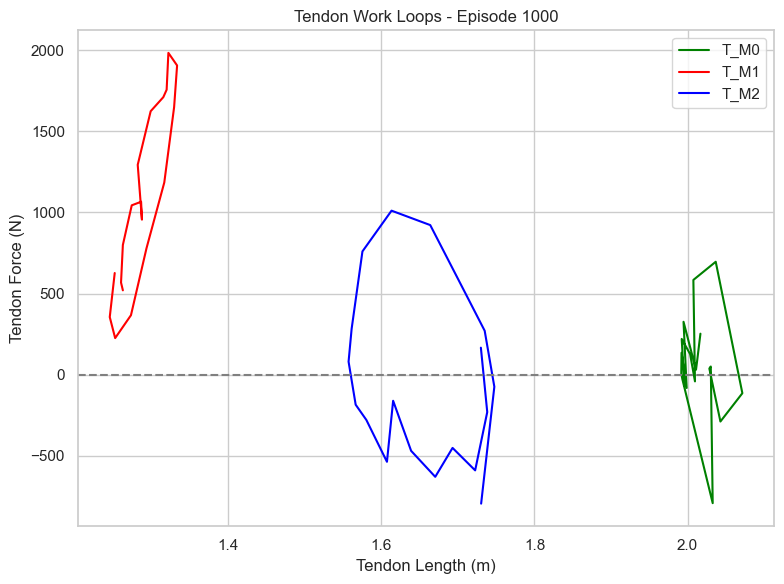

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# === INPUTS ===
tendon_names = ['T_M0', 'T_M1', 'T_M2']
rest_lengths = np.array([2.0486, 1.2341, 1.7341])  # in meters
start, end = 900, 919  # timesteps to analyze
timestep = 0.005  # seconds

# === Load your data ===
data = np.load(r'C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100\tendon_lengths\tendon_lengths_seed_100.npy', allow_pickle=True)
episode_data = np.array(data[1000])  # use your target episode index

# Example: total_force is already computed (shape = [timesteps, 3])
# If not, compute total_force = spring_force + damping_force
# total_force = ...

# === Plot work loops ===
plt.figure(figsize=(8, 6))
colors = [ 'green', 'red', 'blue']

for i, tendon in enumerate(tendon_names):
    length = episode_data[start:end, i]
    force = total_force[start:end, i]

    # Plot work loop
    plt.plot(length, force, label=f'{tendon}', color=colors[i])

    # Compute mechanical work using trapezoidal integration
    delta_L = np.diff(length)
    avg_force = (force[:-1] + force[1:]) / 2
    work = np.sum(avg_force * delta_L)
    print(f"Mechanical work for {tendon}: {work:.4f} J")

plt.xlabel('Tendon Length (m)')
plt.ylabel('Tendon Force (N)')
plt.title(f'Tendon Work Loops - Episode 1000')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Mechanical work for M0: 1.3085 J
Mechanical work for M1: 1.6280 J
Mechanical work for M2: 153.2323 J


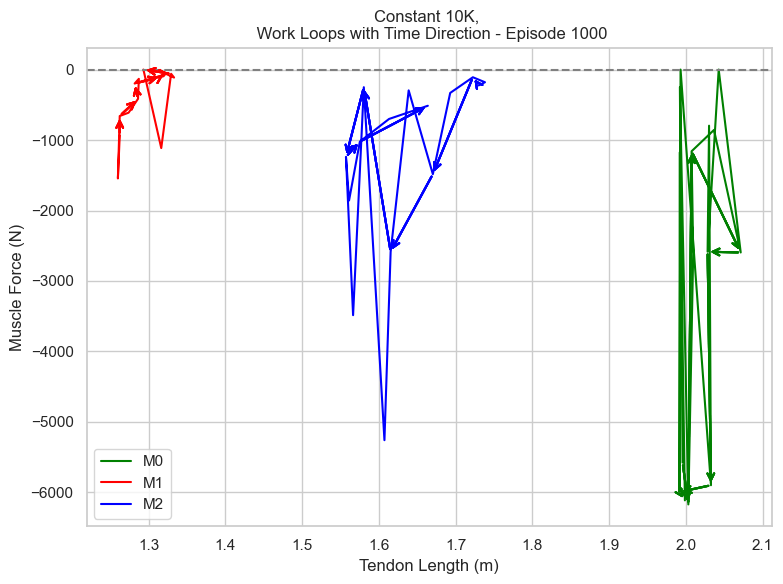

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import os

import numpy as np
import matplotlib.pyplot as plt
import os

import numpy as np
import matplotlib.pyplot as plt
import os

def work_loops(folder, seed=100, episode_index=1000, start=900, end=915):
    """
    Plot work loops for M0, M1, M2 with arrows indicating direction of time.
    Compute mechanical work using trapezoidal integration.
    """
    force_path = os.path.join(folder, f"actuator_forces/actuator_forces_seed_{seed}.npy")
    length_path = os.path.join(folder, f"tendon_lengths/tendon_lengths_seed_{seed}.npy")

    if not os.path.exists(force_path) or not os.path.exists(length_path):
        print("Required files not found.")
        return

    # Load data
    total_force = np.load(force_path, allow_pickle=True)[episode_index]  # shape: (timesteps, 3)
    episode_data = np.load(length_path, allow_pickle=True)[episode_index]  # shape: (timesteps, 3)

    if end is None:
        end = len(total_force)

    tendon_names = ['M0', 'M1', 'M2']
    colors = ['green', 'red', 'blue']

    plt.figure(figsize=(8, 6))

    for i, tendon in enumerate(tendon_names):
        length = episode_data[start:end, i]
        force = total_force[start:end, i]

        # Plot work loop
        plt.plot(length, force, label=f'{tendon}', color=colors[i], linewidth=1.5)

        # Add arrows showing direction of time
        step = 2  # arrow spacing
        for j in range(0, len(length) - step, step):
            x0, y0 = length[j], force[j]
            x1, y1 = length[j + step], force[j + step]
            dx, dy = x1 - x0, y1 - y0
            if dx == 0 and dy == 0:
                continue
          # Add arrows showing direction of time using annotate (more visible than plt.arrow)
            step = 2  # arrow spacing
            for j in range(0, len(length) - step, step):
                x0, y0 = length[j], force[j]
                x1, y1 = length[j + step], force[j + step]
                if np.hypot(x1 - x0, y1 - y0) < 1e-4:
                    continue  # skip arrows with nearly no movement
                plt.annotate(
                    '', xy=(x1, y1), xytext=(x0, y0),
                    arrowprops=dict(arrowstyle='->', color=colors[i], lw=1.5, alpha=0.7)
                )


        # Compute mechanical work (trapezoidal integration)
        delta_L = np.diff(length)
        avg_force = (force[:-1] + force[1:]) / 2
        work = np.sum(avg_force * delta_L)
        print(f"Mechanical work for {tendon}: {work:.4f} J")

    plt.xlabel('Tendon Length (m)')
    plt.ylabel('Muscle Force (N)')
    plt.title(f'Constant 10K, \n Work Loops with Time Direction - Episode {episode_index}')
    plt.axhline(0, color='gray', linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


work_loops(r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_20k_constant_5e-04_PPO_seeds_100-100", seed= 100, episode_index=1000, start=900, end=915) 

C:\Users\User\AppData\Local\Temp\ipykernel_12012\2564915713.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


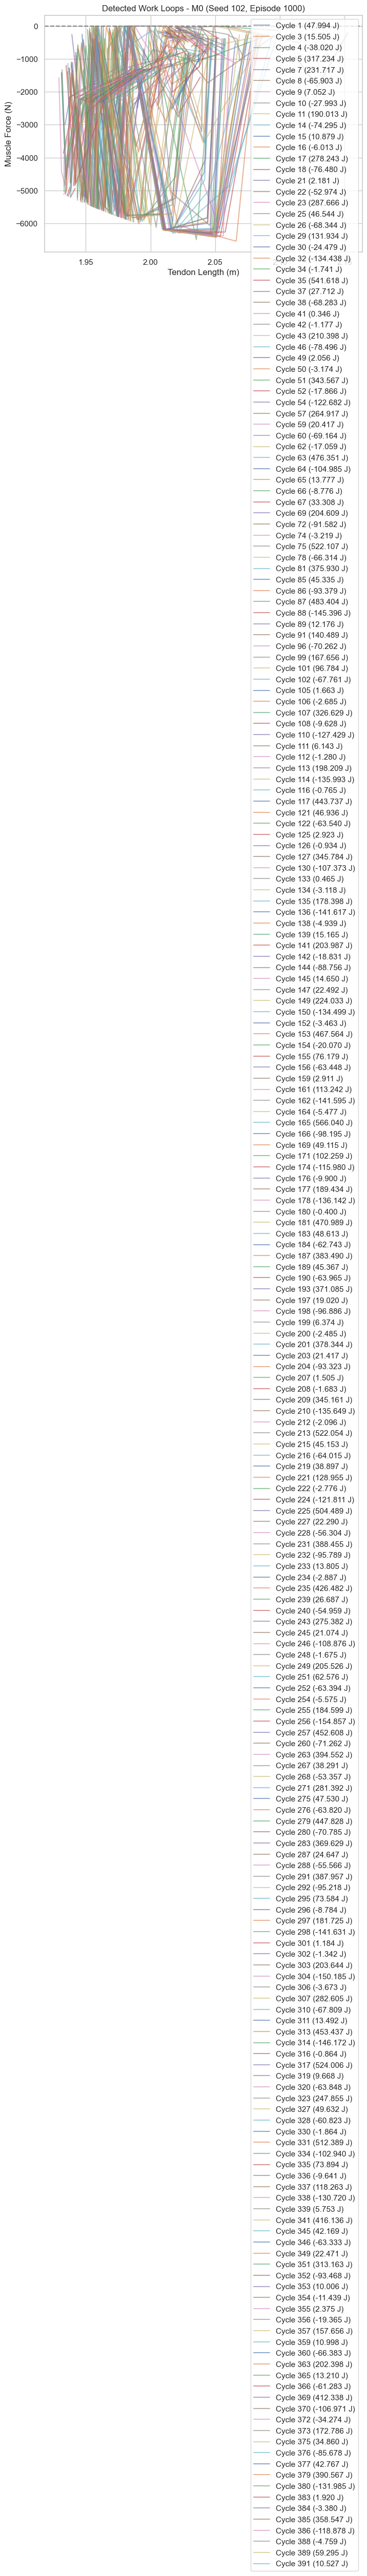

Total mechanical work over all cycles for M0: 15645.8557 J


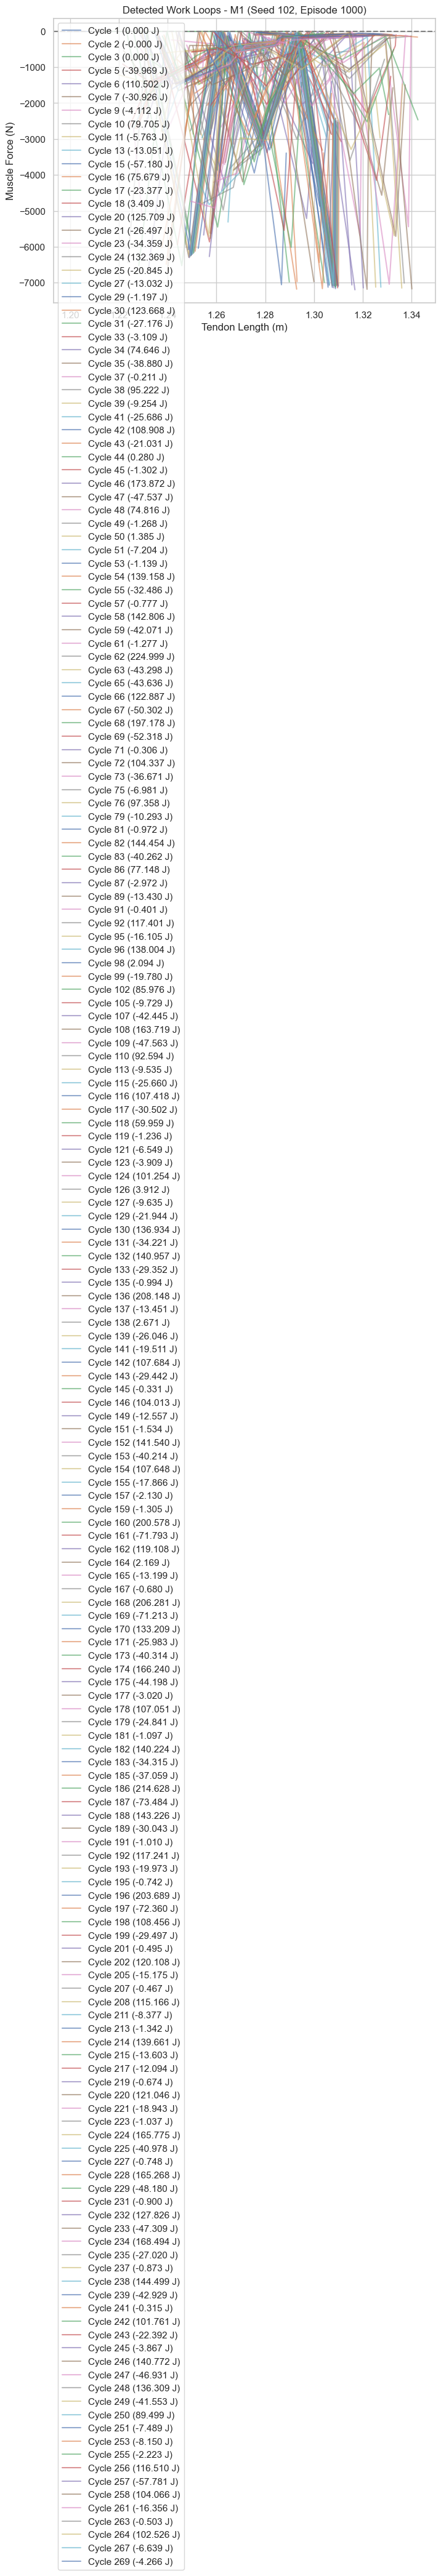

Total mechanical work over all cycles for M1: 5773.2722 J


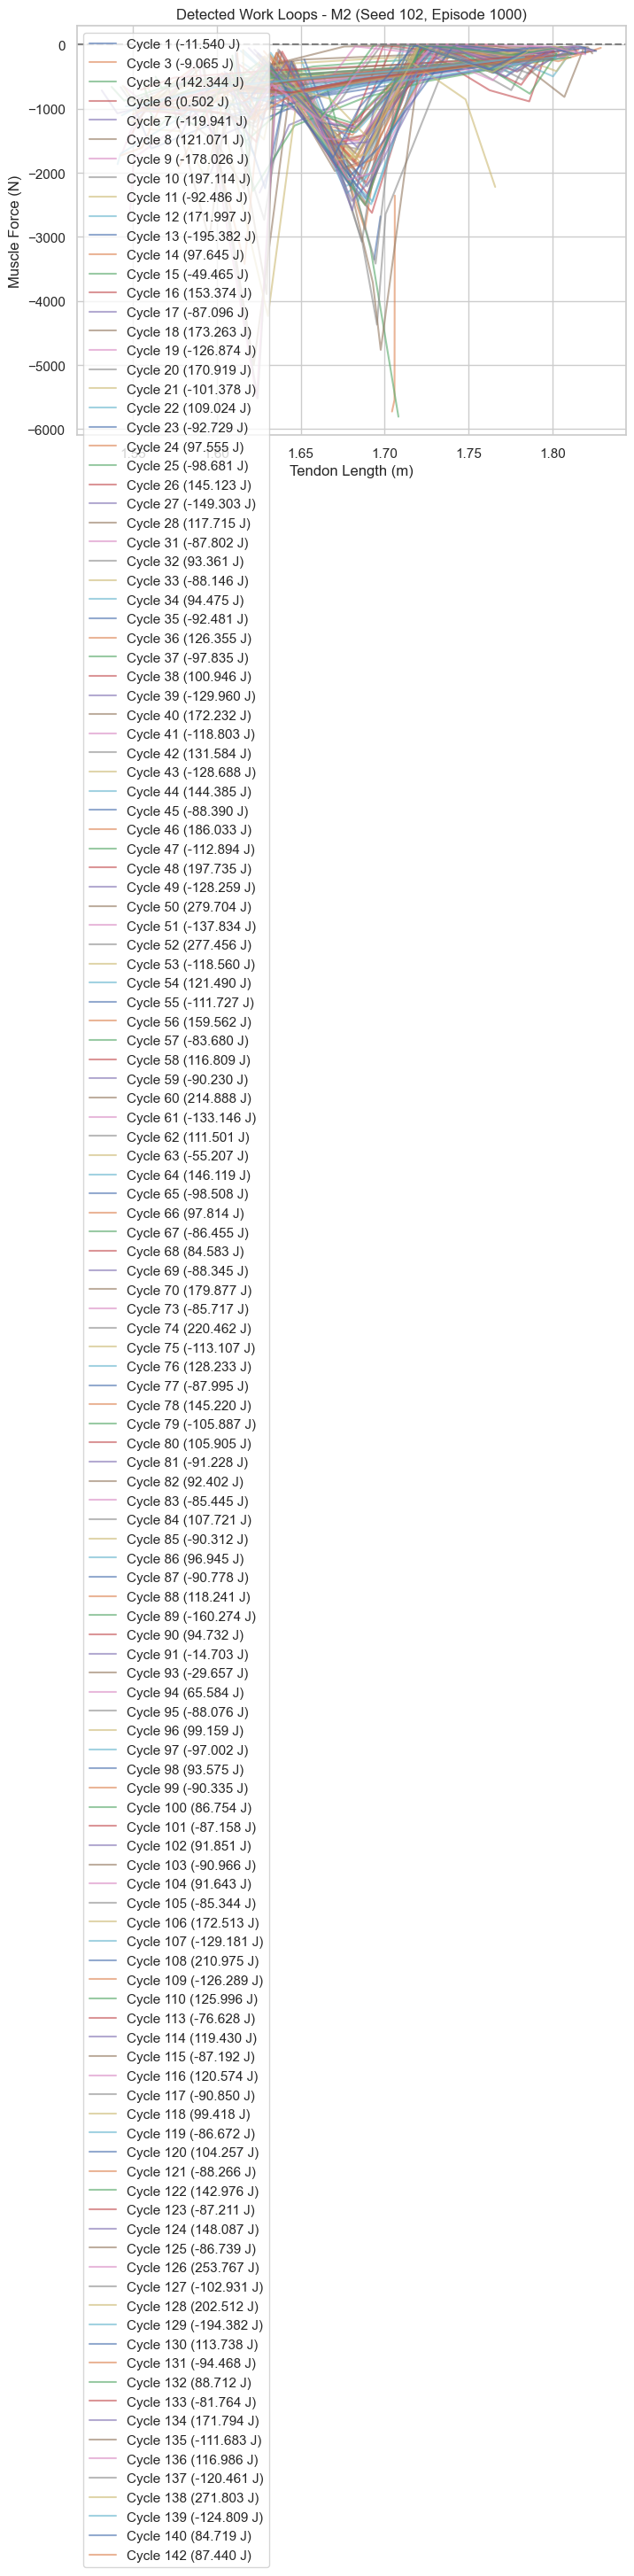

Total mechanical work over all cycles for M2: 2436.2555 J


In [244]:
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_cycles(length_signal):
    """
    Detect cycles based on zero-crossings of length velocity (dL/dt).
    Returns a list of (start_idx, end_idx) tuples defining each contraction cycle.
    """
    dL = np.diff(length_signal)
    sign_changes = np.where(np.diff(np.sign(dL)) != 0)[0] + 1  # +1 to offset np.diff
    cycles = [(sign_changes[i], sign_changes[i + 1]) for i in range(len(sign_changes) - 1)]
    return cycles

def plot_detected_work_loops(folder, seed, episode_index=1000, muscle_index=0):
    """
    Automatically detect and plot contraction cycles for one muscle's work loop.
    """
    force_path = os.path.join(folder, f"actuator_forces/actuator_forces_seed_{seed}.npy")
    length_path = os.path.join(folder, f"tendon_lengths/tendon_lengths_seed_{seed}.npy")

    if not os.path.exists(force_path) or not os.path.exists(length_path):
        print("Required files not found.")
        return

    total_force = np.load(force_path, allow_pickle=True)[episode_index]   # (timesteps, 3)
    total_length = np.load(length_path, allow_pickle=True)[episode_index]  # (timesteps, 3)

    force = total_force[:, muscle_index]
    length = total_length[:, muscle_index]

    cycles = detect_cycles(length)
    tendon_label = f"M{muscle_index}"
    color = ['green', 'red', 'blue'][muscle_index]

    plt.figure(figsize=(8, 6))
    total_work = 0.0

    for i, (start, end) in enumerate(cycles):
        f_seg = force[start:end]
        l_seg = length[start:end]

        if len(f_seg) < 2:
            continue  # skip short or invalid segments

        work = np.trapz(f_seg, l_seg)
        total_work += work

        plt.plot(l_seg, f_seg, label=f'Cycle {i+1} ({work:.3f} J)', alpha=0.6)

    plt.xlabel("Tendon Length (m)")
    plt.ylabel("Muscle Force (N)")
    plt.title(f"Detected Work Loops - {tendon_label} (Seed {seed}, Episode {episode_index})")
    plt.axhline(0, color='gray', linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Total mechanical work over all cycles for {tendon_label}: {total_work:.4f} J")
folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100"
plot_detected_work_loops(folder, seed=102, episode_index=1000, muscle_index=0)  # M0
plot_detected_work_loops(folder, seed=102, episode_index=1000, muscle_index=1)  # M1
plot_detected_work_loops(folder, seed=102, episode_index=1000, muscle_index=2)  # M2


Missing: C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_50k_constant_5e-04_PPO_seeds_100-100\distance\displacement_history_seed_109.npy


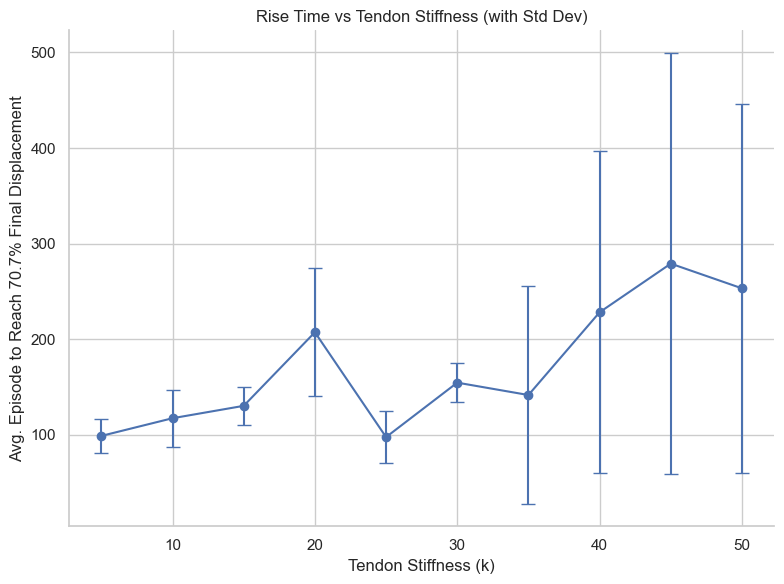

In [184]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

# Base path
base_folder = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data" #\with_springlength_param"

# Detect all tendon folders
# Detect only Jun06 tendon folders
tendon_folders = [
    f for f in os.listdir(base_folder)
    if "constant" in f and "Jun06" in f and os.path.isdir(os.path.join(base_folder, f))
]

# Collect results
stiffness_vals = []
mean_episodes_to_70 = []
std_episodes_to_70 = []

for folder in sorted(tendon_folders):
    full_path = os.path.join(base_folder, folder, "distance")
    if not os.path.exists(full_path):
        continue

    # Extract stiffness value from folder name
    match = re.search(r'constant_(\d+)k', folder)
    if not match:
        continue
    stiffness = int(match.group(1))

    episodes_per_seed = []

    for seed in range(100, 120):  # seeds 100–119
          file_path = os.path.join(full_path, f"displacement_history_seed_{seed}.npy")
          if not os.path.exists(file_path):
            print(f"Missing: {file_path}")
            continue

          disp = np.load(file_path)
          if disp.ndim == 0 or len(disp) == 0:
            continue

#         final_val = disp[-1]
          final_val = np.mean(disp[-10:])  # Mean of last 10 episodes
          threshold = 0.707 * final_val

          try:
            episode_reach = np.argmax(disp >= threshold)
            episodes_per_seed.append(episode_reach)
          except Exception as e:
            print(f"Error in seed {seed}: {e}")

    if episodes_per_seed:
        stiffness_vals.append(stiffness)
        mean_episodes_to_70.append(np.mean(episodes_per_seed))
        std_episodes_to_70.append(np.std(episodes_per_seed))

# Sort for plotting
sorted_data = sorted(zip(stiffness_vals, mean_episodes_to_70, std_episodes_to_70))
stiffness_vals, mean_episodes_to_70, std_episodes_to_70 = zip(*sorted_data)
# Plot with error bars
plt.figure(figsize=(8, 6))
ax = plt.gca()

ax.errorbar(stiffness_vals, mean_episodes_to_70, yerr=std_episodes_to_70, fmt='-o', capsize=5)
ax.set_xlabel("Tendon Stiffness (k)")
ax.set_ylabel("Avg. Episode to Reach 70.7% Final Displacement")
ax.set_title("Rise Time vs Tendon Stiffness (with Std Dev)")

# Add grid
ax.grid(True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [203]:
import json
import numpy as np
import os
from stable_baselines3 import PPO
from env import LegEnvBase  # Your custom environment

# === Configuration ===
model_path = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\data\LegEnv_Jun06_constant_10k_constant_5e-04_PPO_seeds_100-100\final_model_seed_101.zip"
output_json = r"C:\Users\User\Desktop\Dynamic-tendon-Leg\final_eval_metrics.json"
n_episodes = 10
render = False  # Set to True to watch it live
tendon_stiffness = 10000.0  # Use the same as in training

# === Load model and environment ===
model = PPO.load(model_path)
env = LegEnvBase(render_mode="rgb_array")

# === Evaluation ===
episode_rewards = []
episode_lengths = []
success_count = 0

for ep in range(n_episodes):
    print(f"\n--- Episode {ep + 1} ---")
    obs, _ = env.reset()
    done = False
    ep_reward = 0
    ep_length = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        #action, _ = model.predict(obs, deterministic=False)

        print(f"Step {ep_length} | Action: {action}")

        # Step and unpack
        step_result = env.step(action)
        if len(step_result) == 5:
            obs, reward, terminated, truncated, info = step_result
            done = terminated or truncated
        else:
            obs, reward, done, info = step_result

        print(f"Reward: {reward}, Obs[0:3]: {obs[:3]}")
        if render:
            env.render()

        ep_reward += reward
        ep_length += 1

        if isinstance(info, dict) and info.get("is_success"):
            success_count += 1

    episode_rewards.append(ep_reward)
    episode_lengths.append(ep_length)
    print(f"Episode reward: {ep_reward}, length: {ep_length}")

env.close()

# === Aggregate results ===
avg_reward = float(np.mean(episode_rewards))
std_reward = float(np.std(episode_rewards))
avg_length = float(np.mean(episode_lengths))
success_rate = success_count / n_episodes if success_count > 0 else None

results = {
    "avg_reward": avg_reward,
    "std_reward": std_reward,
    "avg_length": avg_length,
    "success_rate": success_rate,
    "episode_rewards": episode_rewards
}

print("\n=== Final Evaluation Metrics ===")
print(json.dumps(results, indent=2))

# === Save to JSON ===
os.makedirs(os.path.dirname(output_json), exist_ok=True)
with open(output_json, "w") as f:
    json.dump(results, f, indent=2)
print(f"\nResults saved to {output_json}")

c:\Users\User\miniconda3\envs\CSCI699\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() takes at most 16 arguments (18 given)
  warnings.warn(



--- Episode 1 ---
Step 0 | Action: [0. 0. 1.]
Reward: -0.5541929163859585, Obs[0:3]: [-0.01385482 -0.10705191 -0.39693147]
Step 1 | Action: [0. 0. 1.]
Reward: -1.8792329079711314, Obs[0:3]: [-0.06083565 -0.2221065  -0.23661409]
Step 2 | Action: [1. 0. 0.]
Reward: -0.43645194705829504, Obs[0:3]: [-0.07174694 -0.11077036 -0.43929414]
Step 3 | Action: [0. 0. 1.]
Reward: 4.953967790868825, Obs[0:3]: [ 0.05210225  0.33833357 -0.76151565]
Step 4 | Action: [0. 0. 1.]
Reward: 2.4771643511639727, Obs[0:3]: [ 0.11403136  0.53231142 -0.72455004]
Step 5 | Action: [0. 0. 1.]
Reward: 2.022482494936182, Obs[0:3]: [ 0.16459342  0.65914458 -0.53671449]
Step 6 | Action: [0. 0. 1.]
Reward: 1.1190002236131869, Obs[0:3]: [ 0.19256843  0.73056437 -0.30042673]
Step 7 | Action: [0. 0. 1.]
Reward: 0.22371269034328622, Obs[0:3]: [ 0.19816124  0.74590118 -0.01578799]
Step 8 | Action: [0. 0. 1.]
Reward: 0.05797605908690828, Obs[0:3]: [0.19961065 0.80695093 0.07949334]
Step 9 | Action: [0. 0. 1.]
Reward: 0.153430

In [204]:
print(model.policy)  # Check for random weights


ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=6, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=6, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=3, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)


In [205]:
weights = model.policy.mlp_extractor.policy_net[0].weight.data.cpu().numpy()
print("First layer weights (policy net):")
print(weights)


First layer weights (policy net):
[[-7.59260729e-02 -8.94718766e-02 -2.61600286e-01  4.39456433e-01
  -4.52249289e-01  3.90982293e-02]
 [-3.98733560e-03  1.99176401e-01  1.53028086e-01  4.12469804e-02
  -2.23353475e-01 -1.57395363e-01]
 [ 2.99690384e-02 -2.94744186e-02 -2.52822936e-01 -6.58774450e-02
   3.28727663e-01 -2.51201630e-01]
 [ 4.60334271e-02 -4.38746005e-01  3.69873345e-01  4.18935806e-01
  -4.81002666e-02  8.26939419e-02]
 [ 6.85726479e-02 -4.39245224e-01 -6.08558118e-01  1.36326417e-01
  -1.93431139e-01 -1.18873660e-02]
 [-5.67652332e-03 -6.63405657e-02  1.43817037e-01  1.77259848e-01
   3.31429154e-01  2.68226117e-01]
 [ 2.04710811e-01  9.74695757e-02 -2.63622999e-02 -1.16728760e-01
  -1.68986514e-01  1.41540484e-03]
 [-2.41119474e-01 -1.66656584e-01  3.10575187e-01 -3.31547321e-03
  -1.47499759e-02 -1.47111788e-01]
 [-1.14077017e-01  5.82898632e-02  3.97988170e-01 -1.99132517e-01
  -2.57218629e-01  6.91479295e-02]
 [ 5.01078414e-03  1.02719814e-01  5.40167354e-02 -2.8014

In [206]:
obs, _ = env.reset()
for _ in range(5):
    action, _ = model.predict(obs, deterministic=True)
    print(f"Action: {action}")
    obs, _, done, _, _ = env.step(action)


Action: [0. 0. 1.]
Action: [0. 0. 1.]
Action: [1. 0. 0.]
Action: [0. 0. 1.]
Action: [0. 0. 1.]
